# **California Housing Price**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

During 2015–2017, Portugal experienced a major tourism surge, with international arrivals rising significantly and reaching 15.4 million visitors in 2017. This growth brought substantial economic benefits as tourism spending increased sharply between 2016 and 2017, reflecting strong demand from international travelers. As hotels enjoyed higher reservation volumes, they also faced new operational pressures from fluctuating seasonal demand and greater dependence on online booking channels. These conditions shaped a rapidly expanding yet increasingly unpredictable hospitality environment. 

Amid this boom, hotels began seeing a rise in last minute cancellations, which created challenges in revenue forecasting, room inventory planning, and operational efficiency. Even with full pipelines of bookings, many hotels struggled because cancellations frequently left rooms unsold despite the high demand. The Hotel Booking Demand Kaggle dataset captures these real behaviors from a city and resort hotel in Portugal during this period, reflecting the industry’s struggle to manage growing cancellation patterns. In this context, machine learning becomes an essential tool, enabling hotels to predict cancellation risks and make proactive, data driven decisions to protect revenue during a time of rapid tourism growth.

reference: 
- https://www.ceicdata.com/en/portugal/tourism-statistics

- https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_publicacoes&PUBLICACOEStipo=ea&PUBLICACOEScoleccao=5586641




**Problem Statement**

Despite the significant growth of Portugal’s tourism sector between 2015–2017, hotels increasingly struggled with unpredictable booking cancellations that led to revenue loss, inaccurate demand forecasting, and inefficient room allocation. As booking behaviors shifted toward online platforms, cancellation rates rose and became harder to anticipate. This growing unpredictability created operational and financial challenges, highlighting the need for a better understanding of the factors that drive guest cancellations.

**Solution**

By applying machine learning, hotels can better anticipate which bookings are likely to be canceled, allowing them to reduce the operational and financial costs caused by false negatives (missed high‑risk cancellations) and false positives (incorrectly flagged reservations). This data‑driven approach helps hotels make more accurate decisions about forecasting, overbooking strategies, and resource allocation, ultimately minimizing revenue loss and improving occupancy stability.

**Goals**

- Optimize room availability and revenue by identifying bookings likely to be canceled before they occur.

- Understand guest behavior patterns that lead to cancellations to support better marketing and pricing decisions.

- Minimize financial loss and operational inefficiency by turning predictive insights into proactive booking management strategies.

**Stakeholder**

| **Stakeholders** | **Purpose** |
| --- | --- |
|Hotel Managers| Use predictions from machine learning to plan staffing and room availability more efficeintly|
|Revenue Management Teams| Adjusting price and promotions to reduce losses from cancellations|
|Booking Coordinators| Identify high risk bookings early and follow up with guests to confirm or rebook|
|Marketing / Customer Relations| make retention campaigns for guests likely to cancel|

**Analytic Approach**

The project follows a structured machine learning pipeline:

1. **Data Preparation** → handling missing values, preparing numerical and categorical features.

2. **Feature Transformation** → scaling, encoding, and considering outlier adjustments.

3. **Model Development** → training multiple algorithms, both baseline and advanced.

4. **Model Tuning** → optimizing hyperparameters to improve performance.

5. **Model Interpretation** → using feature importance and explainable AI techniques to understand predictions.

6. **Data Visualization with Tableau**

7. **Streamlit**

**Confusion Matrix** 

| **Error Type** | **Intepretation** | **Business Impact** | **Cost** |
| --- | --- | --- | --- |
|False Positive (FP)|The model predicts a booking will be canceled, but in reality, the guest shows up.|❌ Customer dissatisfaction, brand damage, and compensation costs.|Possible overbooking → must relocate or compensate guest. $172 (see before conclusion) |
|False Negative (FN)|The model predicts a booking will not be canceled, but it does cancel.|❌ Lost revenue, especially if not rebooked in time.|Room stays empty → direct lost room revenue. (mean adr * mean total nights) = $343 (see before conclusion) |


$$
Fβ​=(1+β^2)⋅((Precision⋅Recall)/((β^2⋅Precision)+Recall)​)
$$

with β = 2, then
$$
F2=5⋅((Precision⋅Recall)/((4⋅Precision)+Recall))
$$


**Metric Evaluation**

To fairly assess the models, multiple evaluation metrics are used:

| **Metric**               | **Purpose**                      | **Reason**                                                                                                                                                        |
| :------------------- | :--------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `ROC–AUC`          | Model selection              | To evaluate the model’s ability to rank canceled vs non-canceled bookings across all thresholds. |
| `F2`          | Model tuning & final scoring | To emphasize that the impact of False Negative (FN) is more costly than False Positive (FP) |
| `Confusion Matrix` | Business interpretation      | To visualize classification results and understand FP/FN trade-offs. |

Together, these metrics provide a balanced view of performance, from both absolute and proportional perspectives.

## **untuk ROC_AUC masih bingung reasonnya sama ditaro dimana dia pas modeling**

### **Data Understanding**

- This Dataset depict booking registration each customer made to hotels or resort
- each booking does not necessarily represent 1 people as customer, and can be more
- The dataset is not proportional
- Most categorical feature are Nominal or Binary

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| `hotel` | object | Hotel type (H1 = Resort Hotel, H2 = City Hotel)|
| `is_canceled` | int64 | Booking canceled (1) or not (0)|
| `lead_time` | int64 | Days between booking and arrival |
| `arrival_date_year` | int64 | Year of arrival |
| `arrival_date_month` | object | Month of arrival |
| `arrival_date_week_number` | int64 | Week of year |
| `arrival_date_day_of_month` | int64 | Day of month |
| `stays_in_weekend_nights` | int64 | Nights stayed on weekends |
| `stays_in_week_nights` | int64 | Nights stayed on weekdays |
| `adults` | int64 | Number of adults per booking |
| `children` | float64 | Number of children in the booking |
| `babies` | int64 | Number of babies in the booking |
| `meal` | object | Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board, FB = Full Board, SC = Self Catering) |
| `country` | object | Country of origin of the guest (ISO 3-letter code) |
| `market_segment` | object | Market segment designation (e.g., Direct, Corporate, Online TA, Offline TA, Groups) |
| `distribution_channel` | object | Booking distribution channel (e.g., TA/TO = Travel Agent/Tour Operator, Direct, Corporate) |
| `is_repeated_guest` | int64 | Indicates if the guest has made a previous booking (1 = yes, 0 = no) |
| `previous_cancellations` | int64 | Number of previous bookings canceled by the customer before the current booking |
| `previous_bookings_not_canceled` | int64 | Number of previous bookings not canceled by the customer |
| `reserved_room_type` | object | Code of the room type reserved by the customer |
| `assigned_room_type` | object | Code of the room type assigned by the hotel. May differ from reserved room type due to upgrades or changes |
| `booking_changes` | int64 | Number of changes/amendments made to the booking |
| `deposit_type` | object | Type of deposit made: No Deposit, Non Refund, or Refundable |
| `agent` | float64 | ID of the travel agent who made the booking. Missing values mean no agent |
| `company` | float64 | ID of the company or organization that made the booking. Missing if none |
| `days_in_waiting_list` | int64 | Number of days the booking was on a waiting list before confirmation |
| `customer_type` | object | Type of customer: Contract, Group, Transient, or Transient-Party |
| `adr` | float64 | Average Daily Rate — total revenue of the booking divided by total nights stayed |
| `required_car_parking_spaces` | int64 | Number of car parking spaces required by the customer |
| `total_of_special_requests` | int64 | Total number of special requests made by the customer (e.g., high floor, crib, view) |
| `reservation_status` | object | Current status of the booking: Canceled, Check-Out, or No-Show |
| `reservation_status_date` | object | The date on which the reservation status was last updated |

<br>

dataset source : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

Dataset posted by Jesse Mostipak in Kaggle and originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

In [1]:
# import library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split 

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
#import category_encoders as ce
# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# imbalanced 
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBRegressor, XGBRFRegressor, XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, fbeta_score, classification_report

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)
import pickle
import joblib

### **Data Cleaning**

### 1. Load Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
(df.isna().sum()).sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

## Data Cleaning

In [5]:
df.duplicated().sum()

np.int64(31994)

In [6]:
#drop them
df2 = df.drop_duplicates().reset_index(drop=True)

## d2 checkpoint cleaning duplicates
df2.duplicated().sum()

np.int64(0)

membuat checkpoint dimana df2 dijadikan data yang akan di cleaning seperti menghilangkan duplicate, mengisi atau menghilangkan missing value, dan menghilangkan data-data anomali yang ada disini.

In [7]:
(df2.isna().sum()).sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
arrival_date_month                    0
arrival_date_week_number              0
hotel                                 0
is_canceled                           0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
adults                                0
stays_in_week_nights                  0
babies                                0
meal                                  0
lead_time                             0
arrival_date_year                     0
distribution_channel                  0
market_segment                        0
previous_bookings_not_canceled        0
is_repeated_guest                     0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
previous_cancellations                0
deposit_type                          0


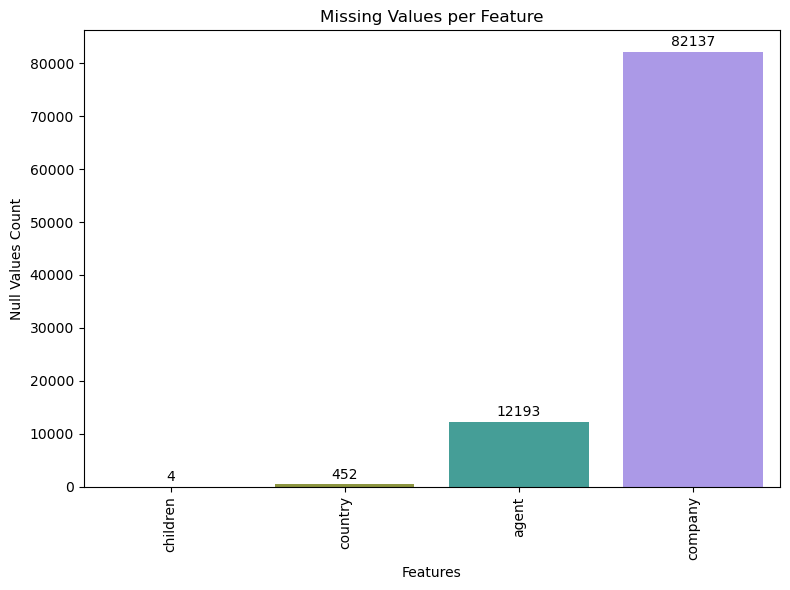

In [8]:
# Create DataFrame of null values
null_df = df2.isnull().sum().reset_index()
null_df.columns = ['features', 'null_count']
null_df = null_df[null_df['null_count'] > 0]  # Optional: show only features with missing values

plt.figure(figsize=(8,6))
ax = sns.barplot(x="features", y="null_count", data=null_df, palette="husl")

# Set labels and rotate x-ticks
ax.set_xlabel("Features")
ax.set_ylabel("Null Values Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Missing Values per Feature")

# Annotate bars properly using x-values from patches
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.text(x, y + 500, int(y), ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

dilihat total missing value dari semua column, terlihat terdapat 4 kolom yang ada missing valuenya, kolom company terdapat banyak missing value sebanyak 82137 diikuti oleh kolom agent sebanyak 12193, dan 2 kolom lainnya yang tidak terlalu banyak missing valuenya, tetapi tetap perlu dilihat

## Correlation

In [9]:
matrix_triux = np.triu(df2.corr(numeric_only=True))

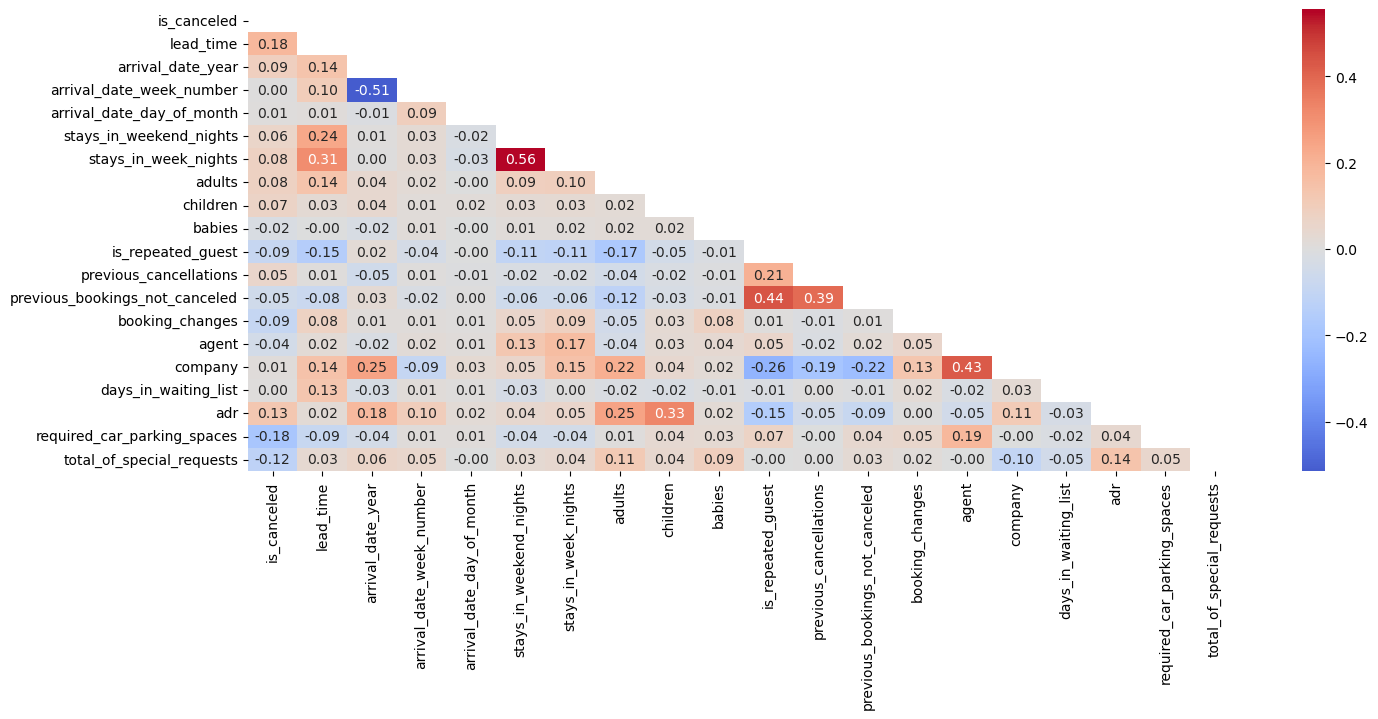

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(data = df2.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            center = 0, mask = matrix_triux,
            fmt=".2f")

plt.show()

heatmap relasi antar kolom yang berisfat numeric. heatmap ini dibuat utamanya untuk melihat kolom kolom yang memiliki relasi lemah terhadap target (`is_canceled`), tetapi juga digunakan untuk melihat hubungan antar kolom lainnya. 

## Chi Square for Categorical 

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# target
target = 'is_canceled'

# Select categorical columns (object or category type)
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

# Chi-Square test for each categorical column
results = []

for col in cat_cols:
    # Drop missing values for the test
    data = df2[[col, target]].dropna()
    
    # Skip columns with only 1 unique value
    if data[col].nunique() < 2:
        continue
    
    # Create contingency table
    contingency = pd.crosstab(data[col], data[target])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    results.append([col, p])

# summary DataFrame
chi_df = pd.DataFrame(results, columns=['Feature', 'p_value']).sort_values('p_value')

# Display results
print("🔍 Chi-Square Test Results (sorted by significance):")
print(chi_df)


sig = chi_df[chi_df['p_value'] < 0.05]['Feature'].tolist()
print("\n✅ Significant features (p < 0.05):")
print(sig)

🔍 Chi-Square Test Results (sorted by significance):
                    Feature        p_value
3                   country   0.000000e+00
4            market_segment   0.000000e+00
5      distribution_channel   0.000000e+00
8              deposit_type   0.000000e+00
10       reservation_status   0.000000e+00
11  reservation_status_date   0.000000e+00
9             customer_type  1.092784e-305
7        assigned_room_type  4.740419e-161
1        arrival_date_month  2.365089e-130
0                     hotel   2.325878e-99
2                      meal   1.244958e-74
6        reserved_room_type   1.168829e-58

✅ Significant features (p < 0.05):
['country', 'market_segment', 'distribution_channel', 'deposit_type', 'reservation_status', 'reservation_status_date', 'customer_type', 'assigned_room_type', 'arrival_date_month', 'hotel', 'meal', 'reserved_room_type']


In [12]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
num_cols = df2.select_dtypes(include=['int64', 'float64']).columns
df2[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_week_number        87396 non-null  int64  
 4   arrival_date_day_of_month       87396 non-null  int64  
 5   stays_in_weekend_nights         87396 non-null  int64  
 6   stays_in_week_nights            87396 non-null  int64  
 7   adults                          87396 non-null  int64  
 8   children                        87392 non-null  float64
 9   babies                          87396 non-null  int64  
 10  is_repeated_guest               87396 non-null  int64  
 11  previous_cancellations          87396 non-null  int64  
 12  previous_bookings_not_canceled  

### **Numerical**

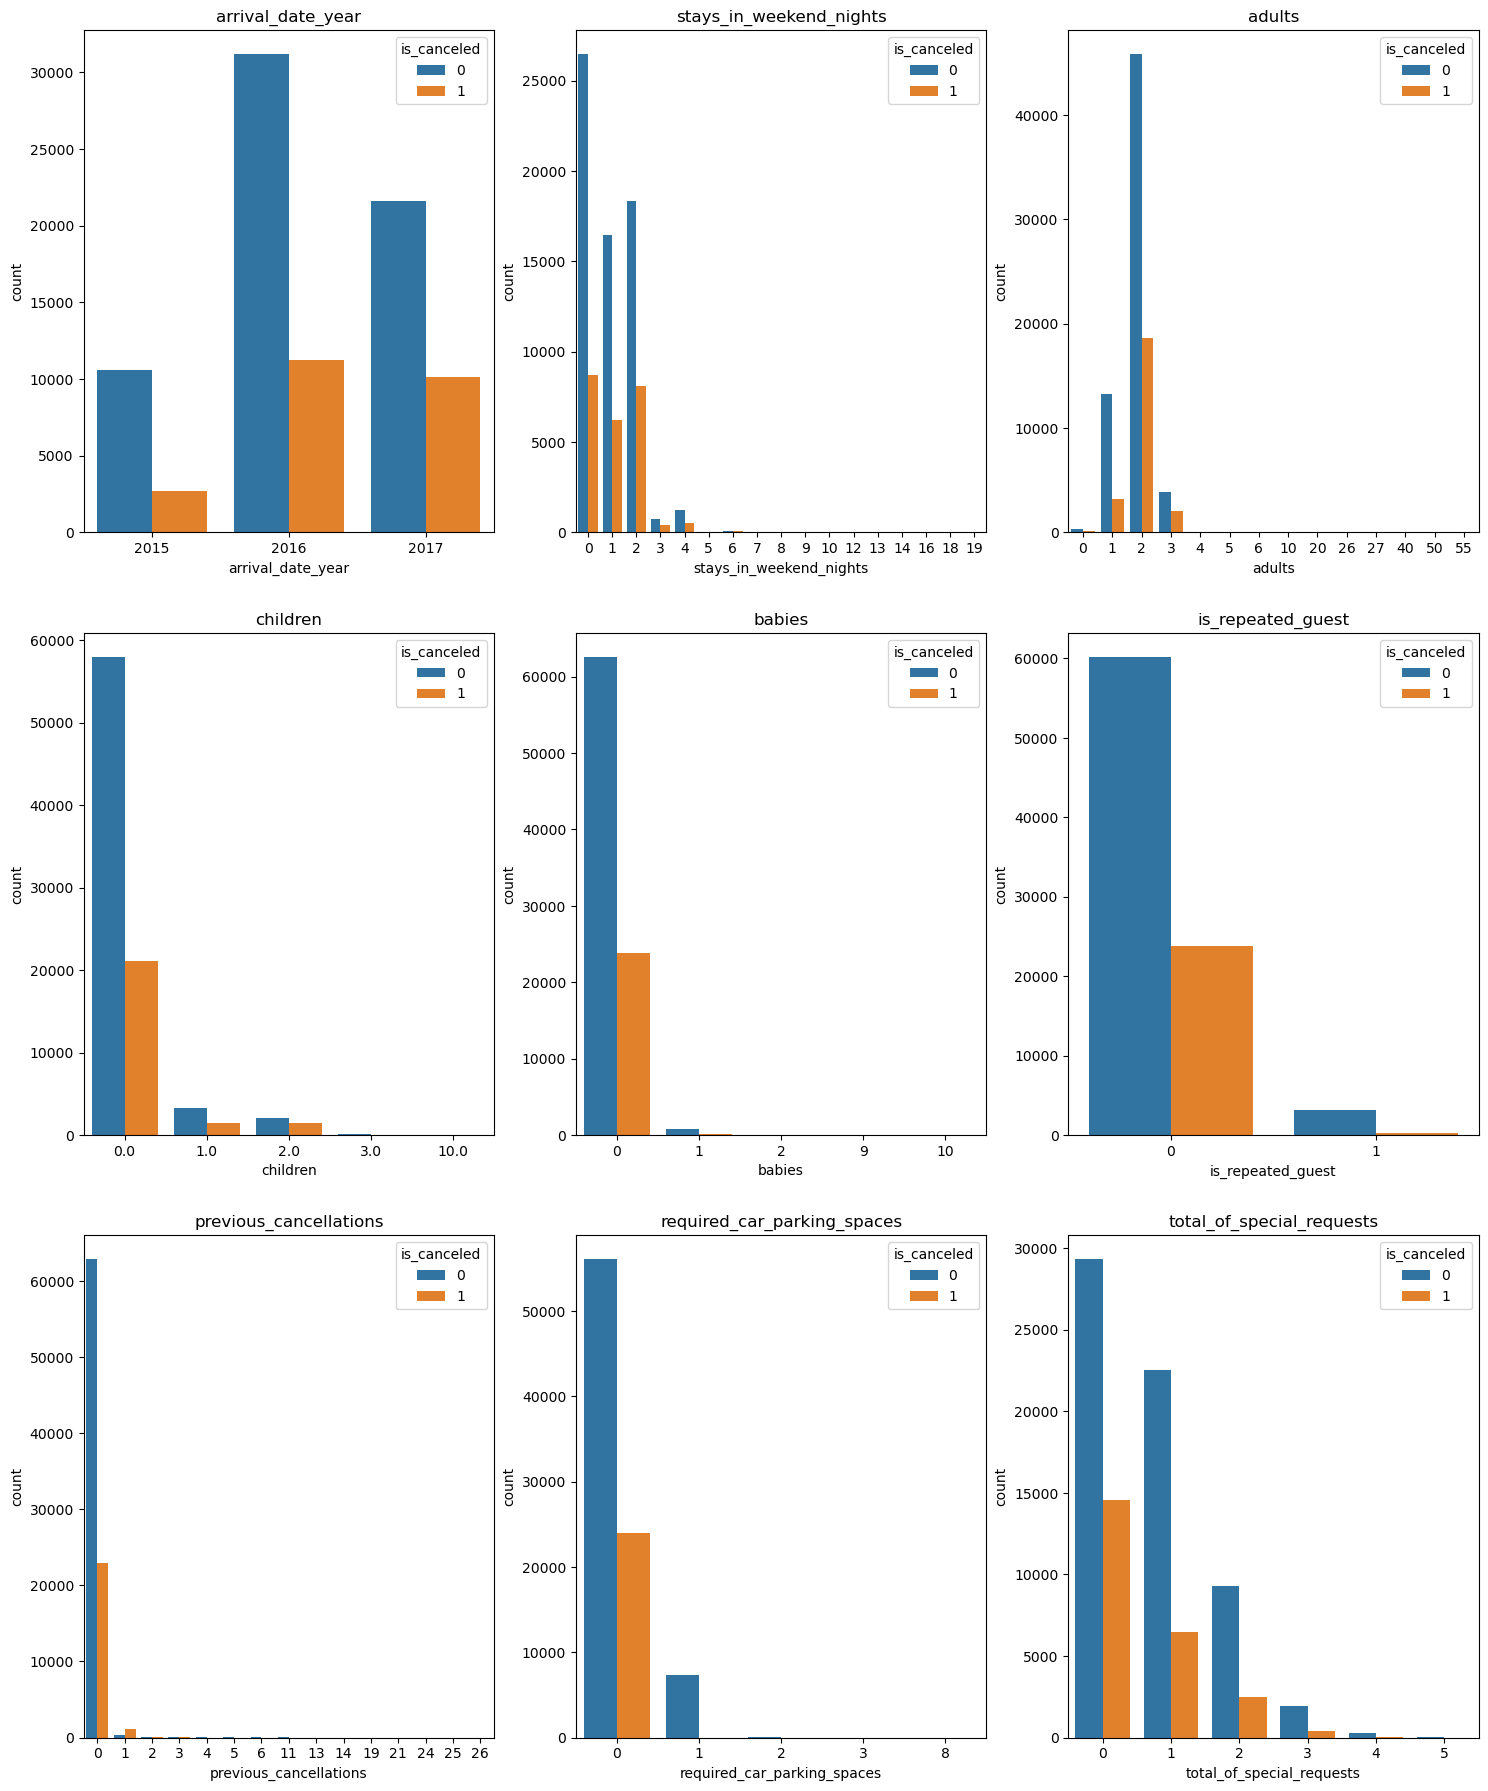

In [14]:
features = [col for col in num_cols if col != 'is_canceled']
plt.figure(figsize=(18, 30))
plotnumber = 1

for feature in features:
    if df2[feature].nunique() < 20:
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=feature, hue='is_canceled', data=df2)
        plt.xlabel(feature)
        plt.title(feature)
        #plt.tight_layout()
        plotnumber += 1

plt.show()

countplot disini dibuat untuk melihat persebaran data is_canceled berdasarkan masing masing kolom bertipe numerical. Berdasarkan countplot ini, dapat dilihat bahwa banyak data anomali di beberapa kolom seperti pada kolom `previous_cancellation` dimana cancel yang lebih dari 1 atau 2 dapat dikatakan anomali. begitu juga pada kolom `required_car_parking_spaces` terdapat anomali sampai 8 parking spaces, `babies` yang sampai 9-10, begitu juga untuk kolom `adults`, `children`, dan `stay_in_weekend_nights`.

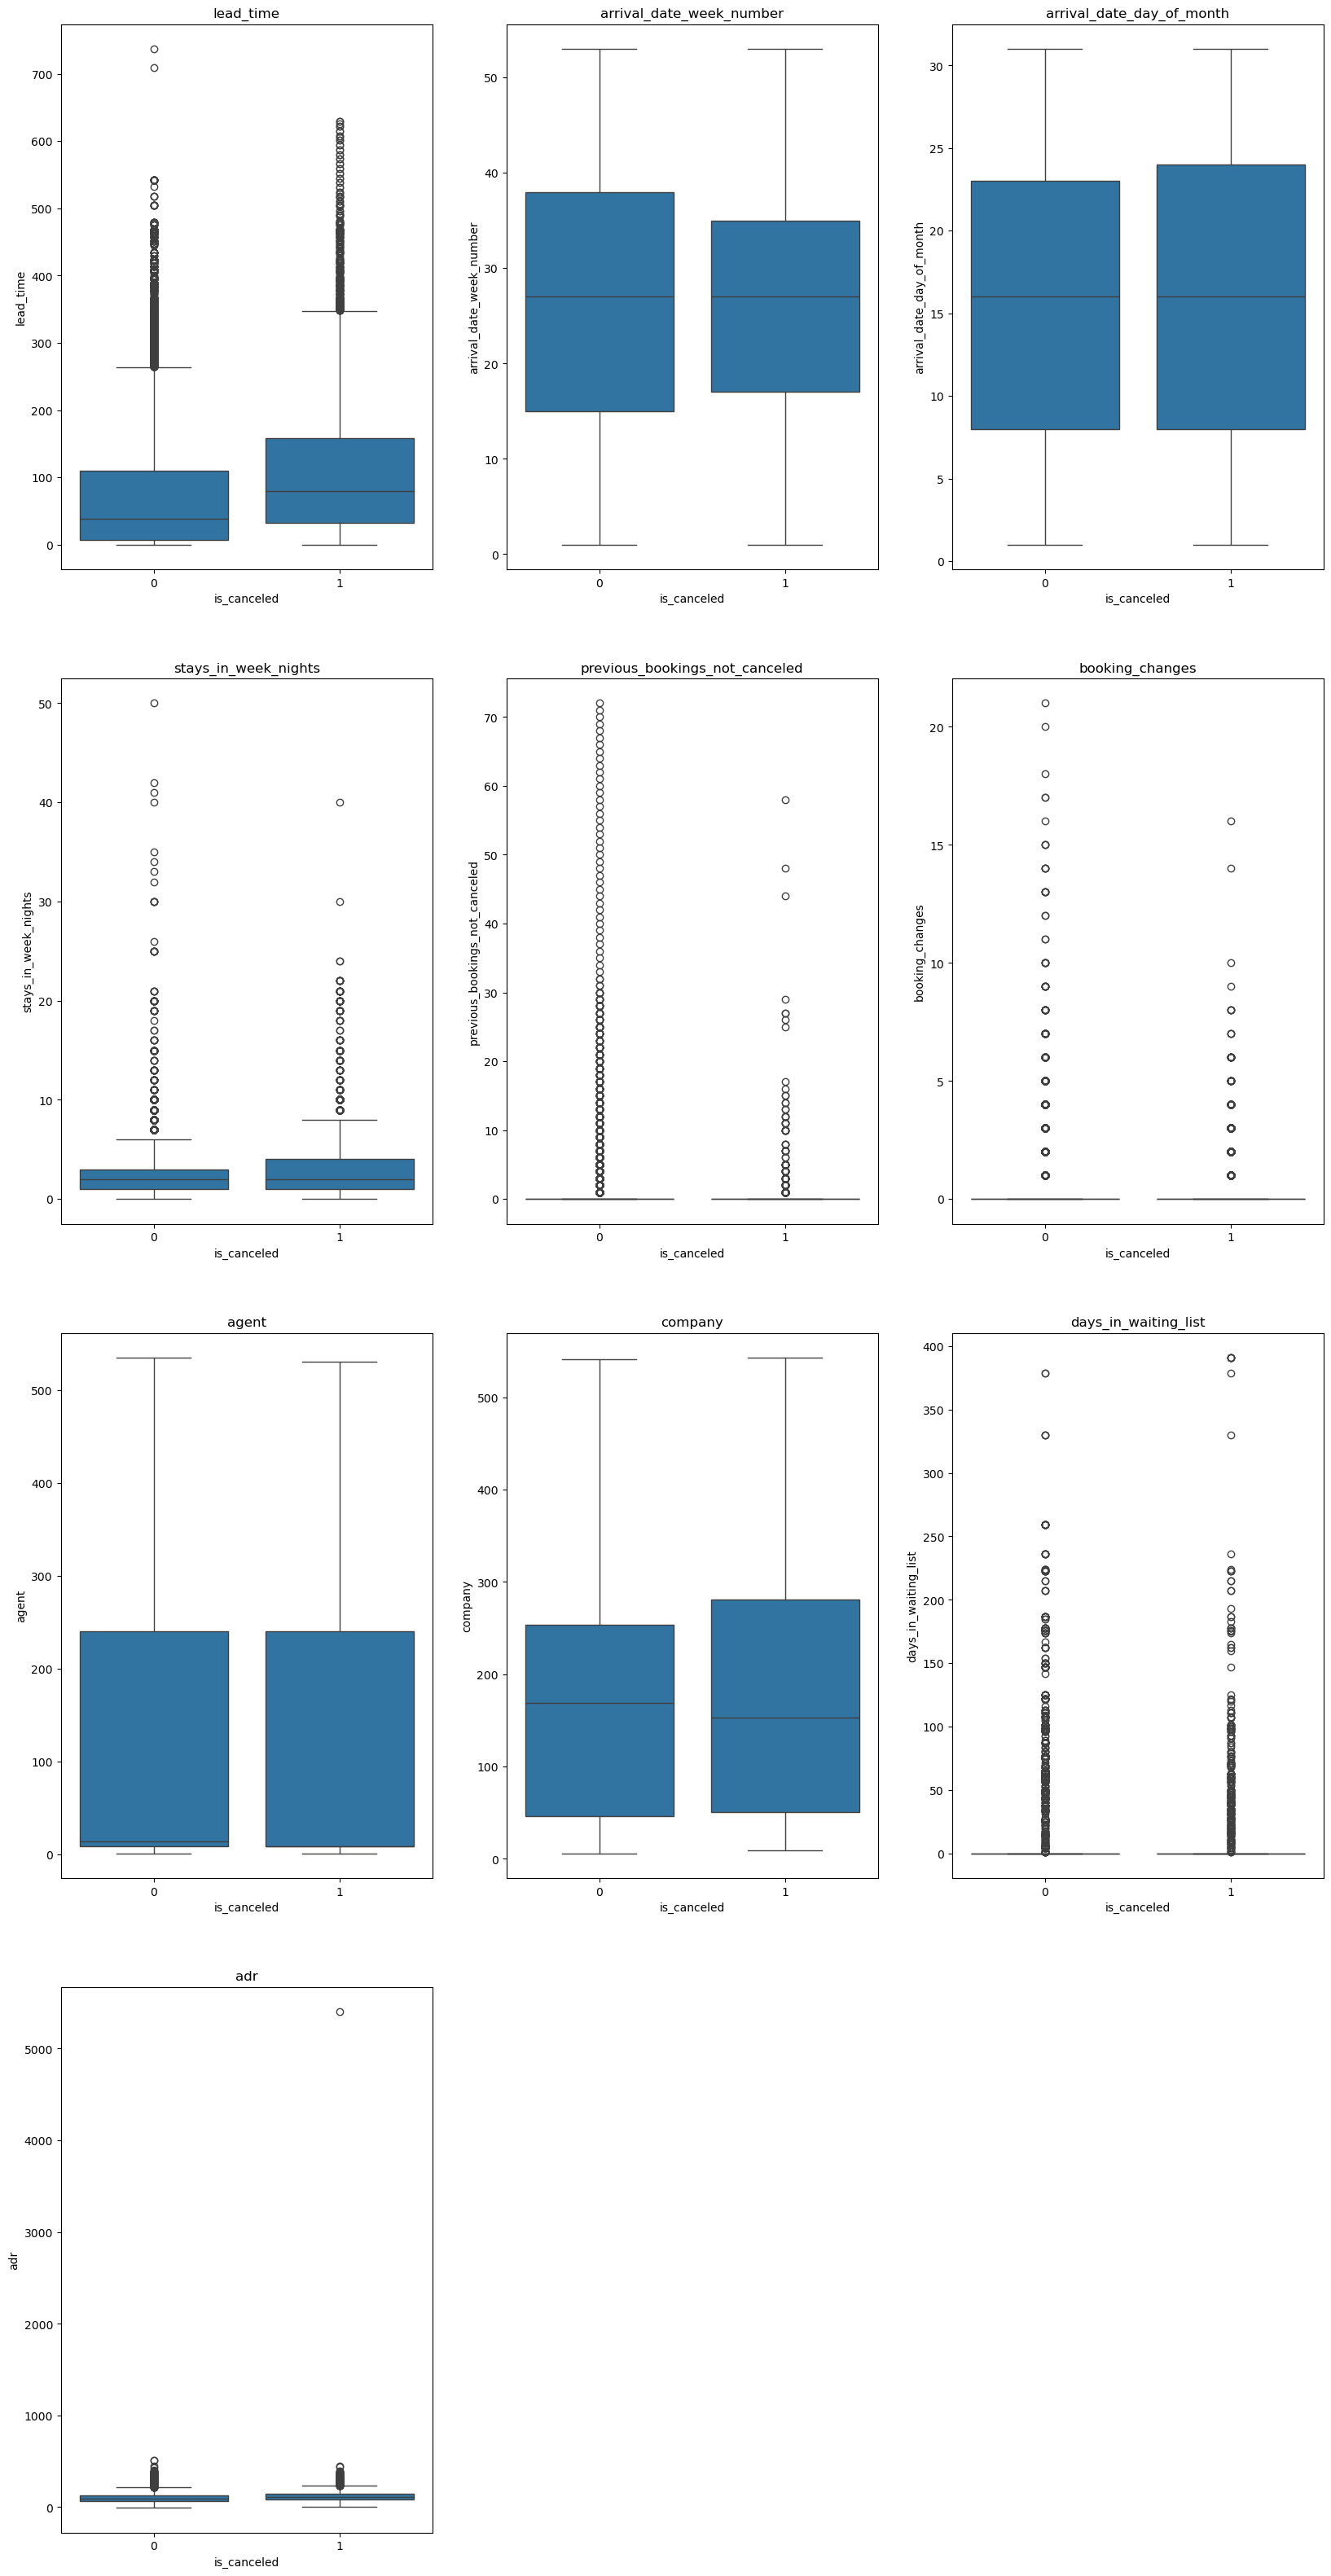

In [15]:
features = [col for col in num_cols if col != 'is_canceled']
plt.figure(figsize=(20, 40))
plotnumber = 1

for feature in features:
    if df2[feature].nunique() >= 20:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(x='is_canceled', y=feature, data=df2)
        plt.title(feature)
        #plt.tight_layout()
        plotnumber += 1
        #plt.show()

plt.show()

penggunaan visualisasi boxplot ini juga bertujuan sama yaitu mencari outlier atau anomali dari kolom bertipe numerical dilihat dari sisi target `is_canceled` 0 atau 1. perbedaannya menggunakan boxplot dari countplot sebelumnya karena variasi unique valuenya yang lebih dari 20 karena sulit divisualisasikan dengan countplot. Berdasarkan hasil analisis anomali atau outlier menggunakan boxplot pada kelompok ini, terdapat kelompok kolom yang sudah bagus dan tidak memiliki anomali atau outlier seperti kolom `agent`, `company`, `arrival_date_week_number`, dan `arrival_date_day_of_month`, lalu kelompok dengan low number of outlier seperti kolom `previous_bookings_not_canceled`, `booking_changes`, dan `stays_in_the_week_nights`, lalu sisanya yang memiliki high number of outlier seperti `adr`, `days_in_waiting_list`, dan `lead_time`.

kelompok dengan low number of outlier berkemungkinan besar dapat langsung di hilangkan outliernya yang berada di atas upper_limit sedangkan high number of outlier perlu beberapa penyesuaian dan analisis lebih lanjut untuk mengurangi jumlah outliernya

### **Categorical**

In [16]:
cat_cols = df2.select_dtypes(include=['object']).columns
df2[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    87396 non-null  object
 1   arrival_date_month       87396 non-null  object
 2   meal                     87396 non-null  object
 3   country                  86944 non-null  object
 4   market_segment           87396 non-null  object
 5   distribution_channel     87396 non-null  object
 6   reserved_room_type       87396 non-null  object
 7   assigned_room_type       87396 non-null  object
 8   deposit_type             87396 non-null  object
 9   customer_type            87396 non-null  object
 10  reservation_status       87396 non-null  object
 11  reservation_status_date  87396 non-null  object
dtypes: object(12)
memory usage: 8.0+ MB


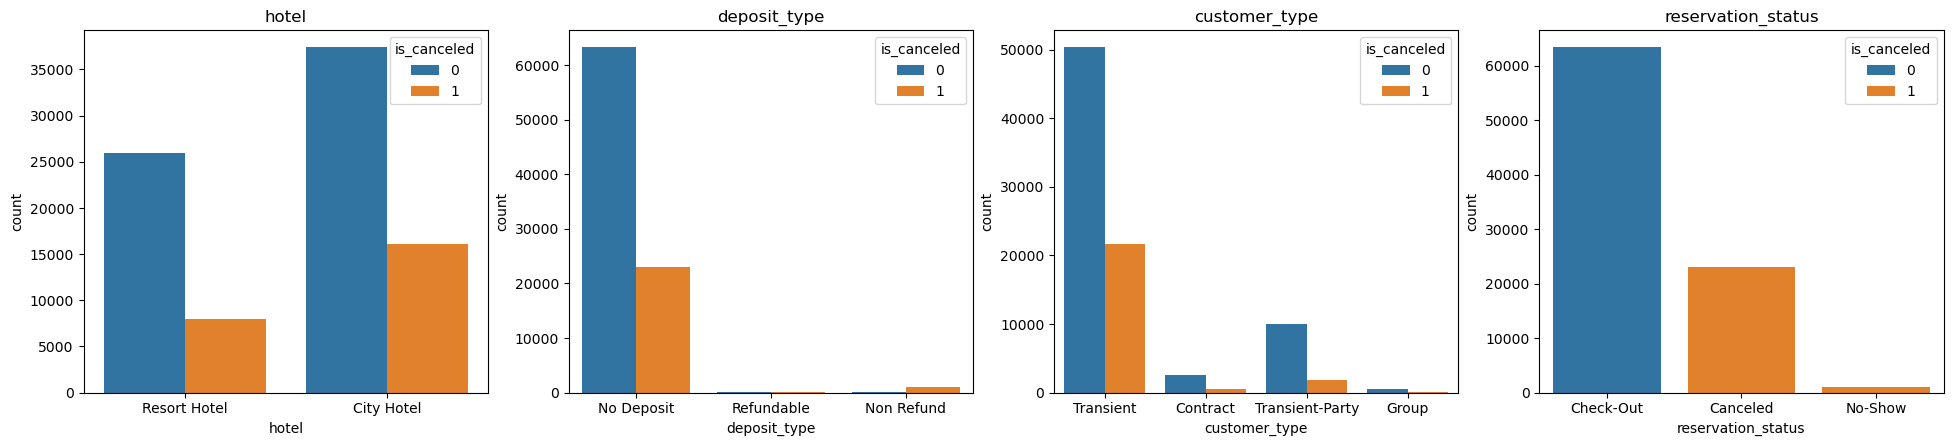

In [17]:
cat_features = [col for col in cat_cols if col != 'is_canceled']
plt.figure(figsize=(24, 16))
plotnumber = 1

for feature in cat_features:
    if df2[feature].nunique() < 5:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=feature, hue='is_canceled', data=df2)
        plt.xlabel(feature)
        plt.title(feature)
        #plt.tight_layout()
        plotnumber += 1

plt.show()

Visualisasi countplot yang digunakaan untuk menganalisis kolom dengan unique value kurang dari 5 ini bertujuan untuk melihat anomali yang ada di kolom kolom ini. akan tetapi pada dasarnya kolom category kemungkinan besar tidak perlu dicari anomali karena hampir semua datanya memiliki makna yang benar

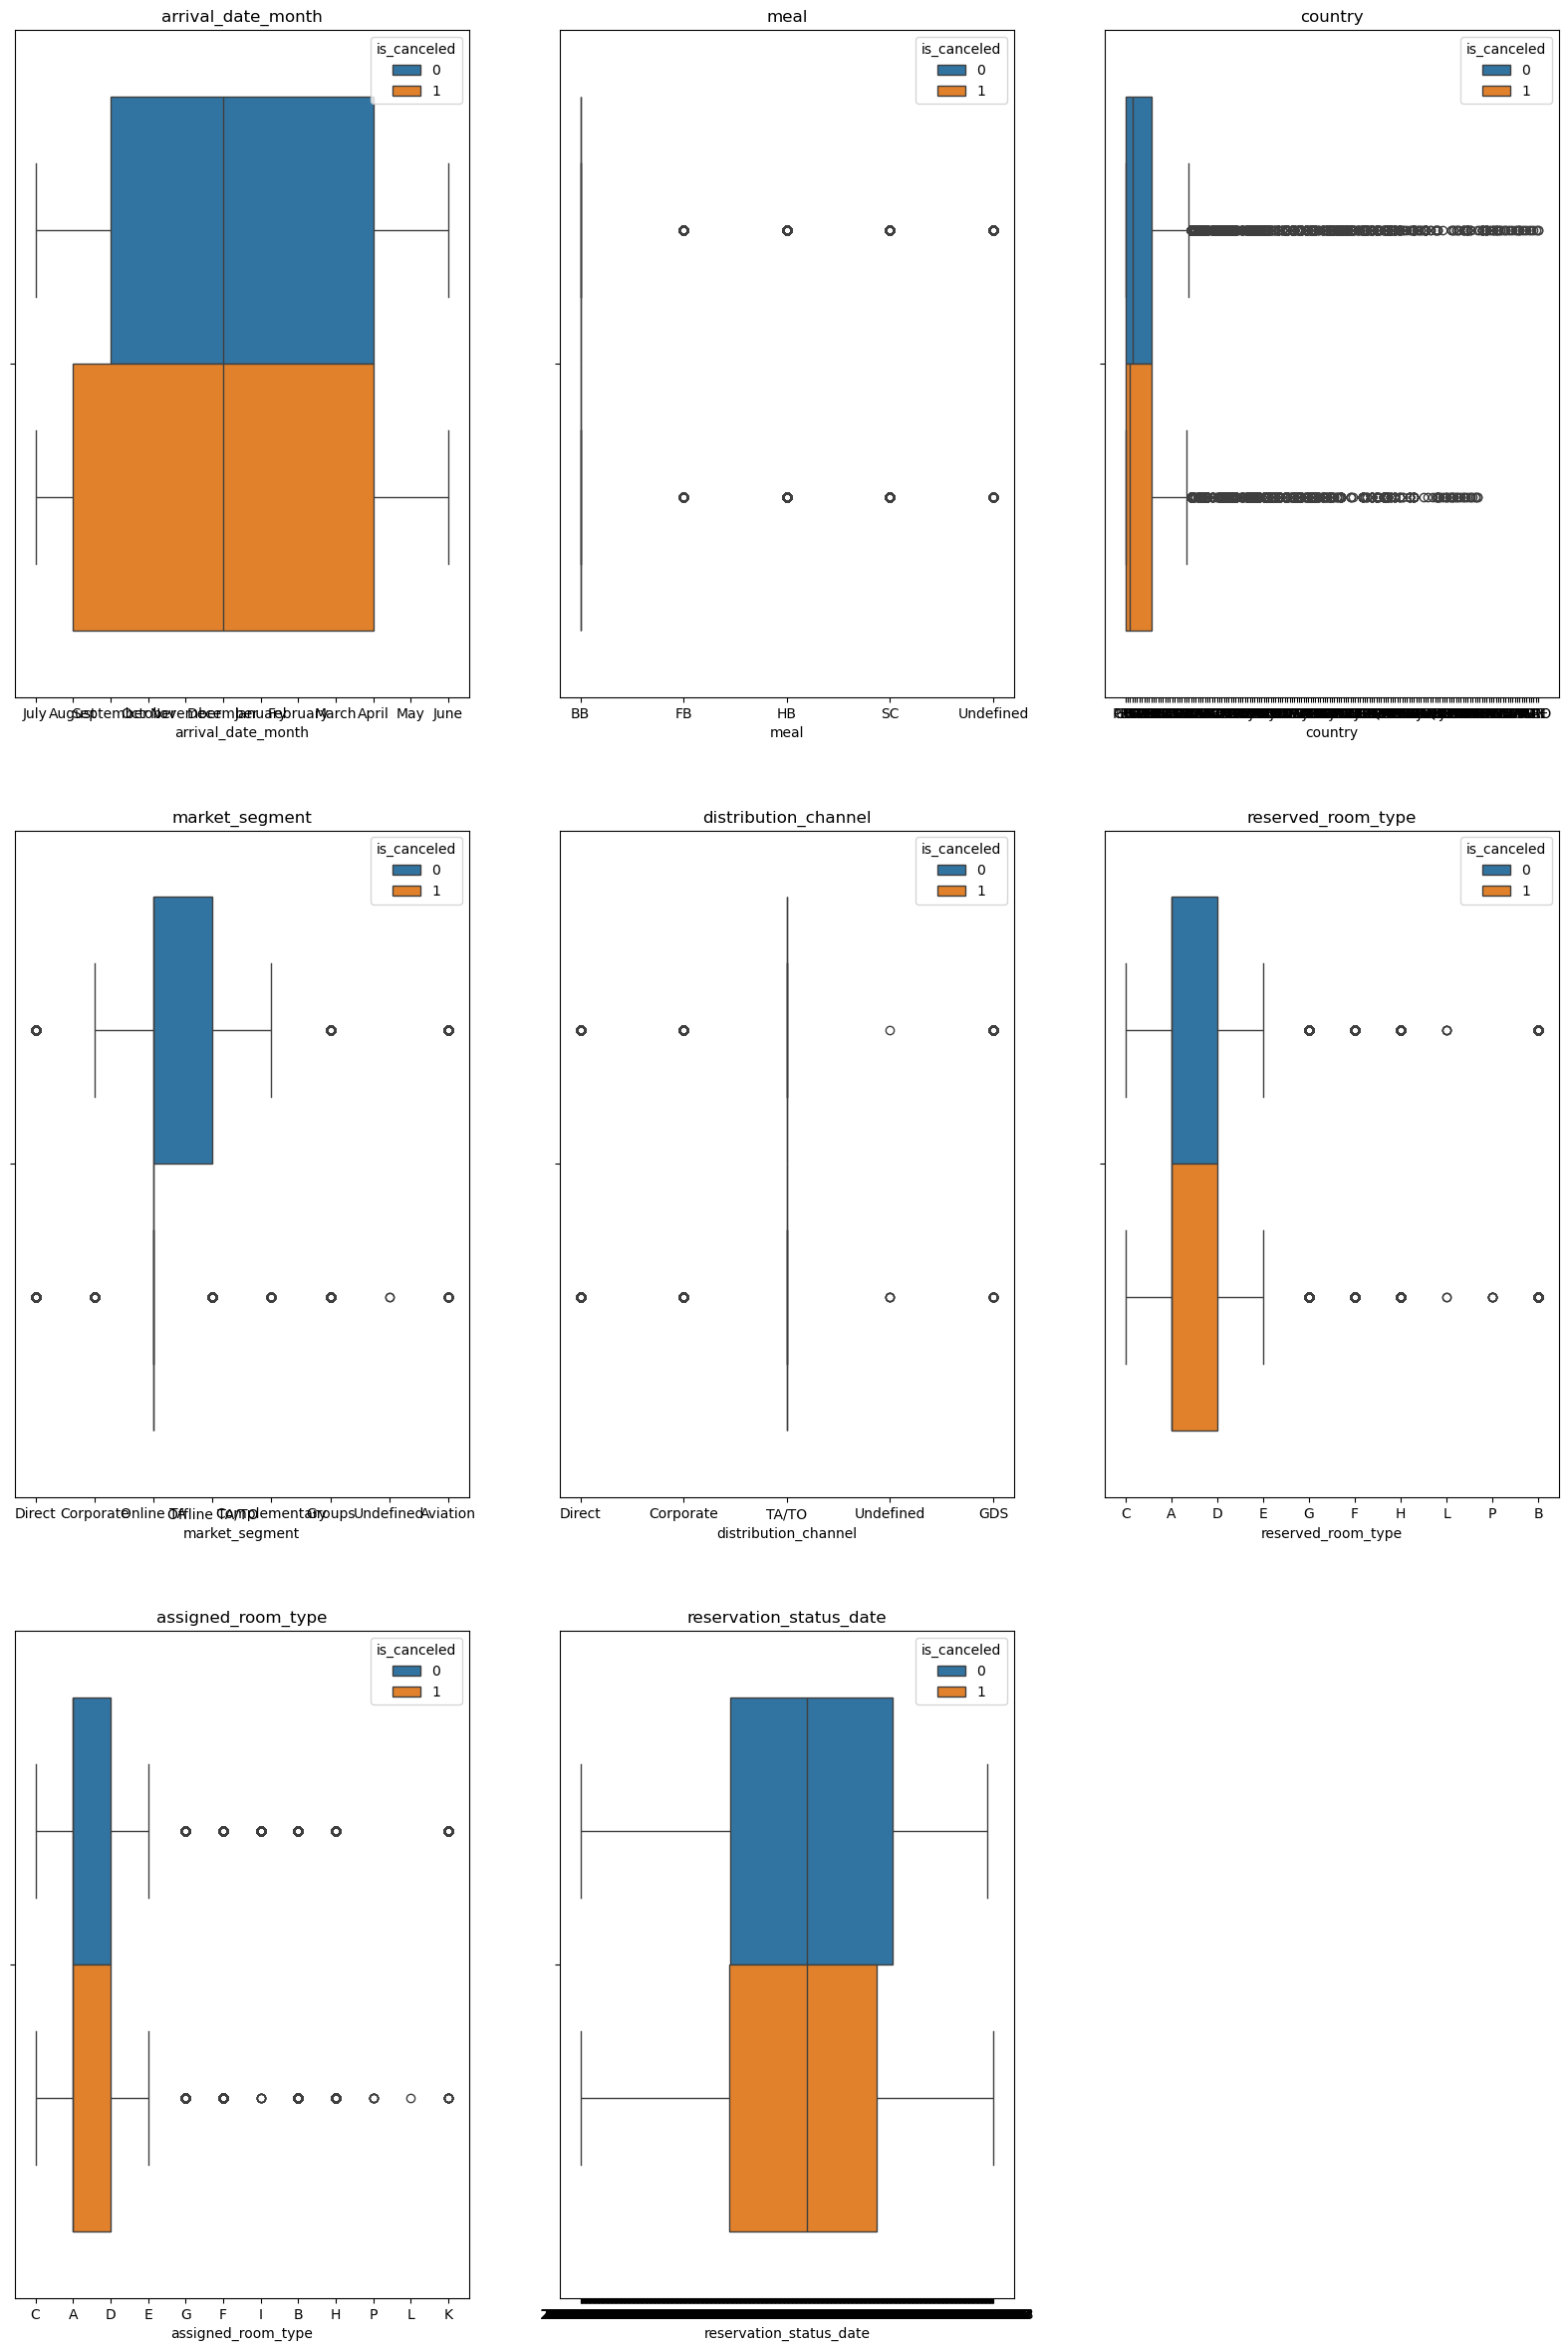

In [18]:
cat_features = [col for col in cat_cols if col != 'is_canceled']
plt.figure(figsize=(20, 40))
plotnumber = 1

for feature in cat_features:
    if df2[feature].nunique() >= 5:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(x=feature, hue='is_canceled', data=df2)
        plt.title(feature)
        #plt.tight_layout()
        plotnumber += 1
        #plt.show()

plt.show()

berdasarkan visualisasi boxplot pada kelompok categorical dengan varias unique valuenya 5 atau lebih disini dapat dikatakan mayoritas kolom hanya memiliki sedikit outlier seperti kolom `assigned_room_type`, `reserved_room_type`, `distribution_channel`, `market_segment`, dan `meal`. selain itu ada kolom `reservation_status_date`, dan `arrival_date_month` yang sudah bagus tanpa anomali atau outlier. hanya kolom `country` yang perlu diperiksa kembali karena terlalu banyak outlier atau anomali datanya.

### **Individual Check**

In [19]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            

In [21]:
df2['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [22]:
df3 = df2.dropna(subset=['children'])

menghilangkan missing value apda kolom children karena mungkin ada kekurangan input pada sistem

In [23]:
df2['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [24]:
df2['country'].isna().sum()


np.int64(452)

In [25]:
df3[df3['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
28,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
3325,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
5283,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
5985,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
6611,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44944,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
45354,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
48091,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
55841,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [26]:
df3 = df3.dropna(subset=['country'])

begitu juga pada kolom country, dimana akan sulit menganalisis orang yang datang tanpa memiliki keterangan negara asal dan berpotensi mengurangi akurasi machine learning. selain itu banyak missing value pada country hanya 452 atau sekitar 0.5% dari total data yang berarti aman untuk dihilangkan

In [27]:
df3[df3['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [28]:
df3['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 382., 461., 478., 112., 486.,
       421.,   9., 308., 135., 224., 504., 269., 356., 498., 390., 513.,
       203., 263., 477., 521., 169., 515., 445., 337., 251., 428., 292.,
       388., 130., 250., 355., 254., 543., 531., 528., 120.,  81., 116.,
       530., 103.,  62.,  39.,  16.,  61.,  92., 501., 291., 290., 192.,
        43., 465., 287., 297., 207., 437., 165., 329., 272.,  28.,  77.,
       482., 200.,  42., 338., 108.,  72., 246., 319., 146., 159., 380.,
       323., 511., 407., 325., 278.,  80., 403., 399.,  14., 137., 343.,
       346., 347., 349., 289., 351., 353.,  54.,  99., 358., 361., 362.,
       366., 372., 365., 277., 109., 377., 379.,  2

In [29]:
df3['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

kolom `agent` dan `company` disini hanya bersifat seperti ID dengan variasi unique valuenya yang terlalu banyak, sehingga tidak memiliki signifikasi yang besar terhadap hasil machine learning yang akan dibuat dan akan lebih bagus apabila kita drop langsung

In [30]:
df4 = df3.drop(columns=['agent', 'company'])

agent dan company tidak memiliki makna khusus selain sebagai id, dan id disini tidak memiliki potensi analisis dan manfaat untuk meningkatkan akurasi ml sehingga langkah terbaiknya adalah menghilangkan kedua kolom ini

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 87395
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                            86940

In [32]:
(df4.isna().sum()).sort_values(ascending=False)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

no missing value dari semua kolom, selanjutnya akan mengecek outlier atau anomali di semua kolom

In [33]:
df4['arrival_date_week_number'].unique() #checked

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [34]:
df4['required_car_parking_spaces'].unique() #suspicious, check with boxplot and histplot

array([0, 1, 2, 8, 3])

ada keanehan dimana 8 parking spaces ini dibutuhkan oleh customer yang booking

In [35]:
df4['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [36]:
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
        'adults', 'children', 'babies', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
        'total_of_special_requests']

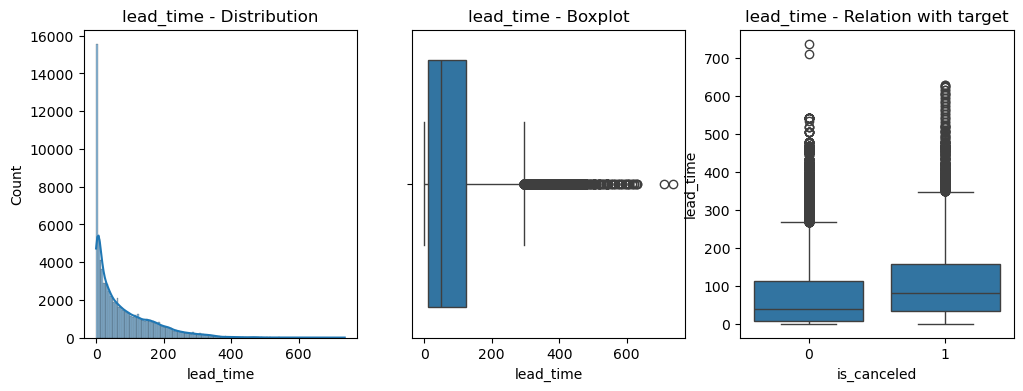

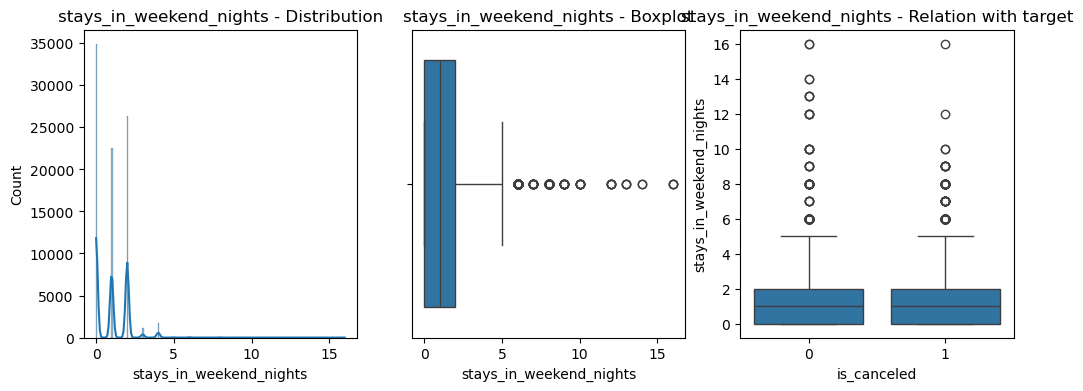

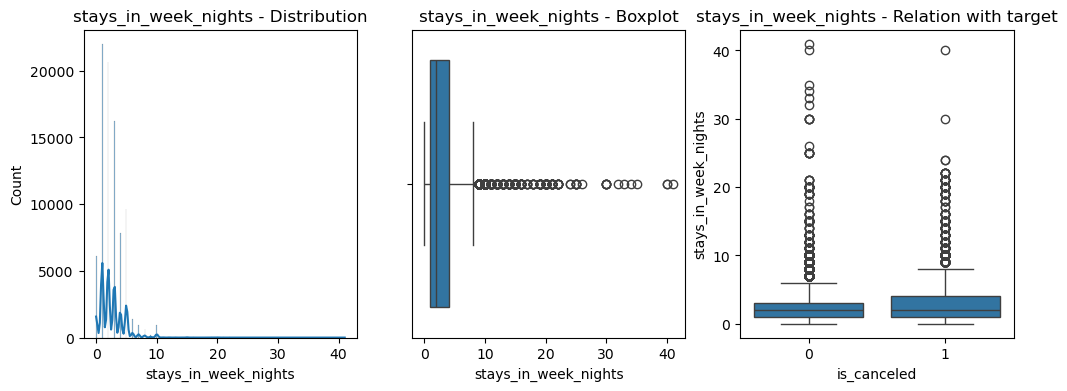

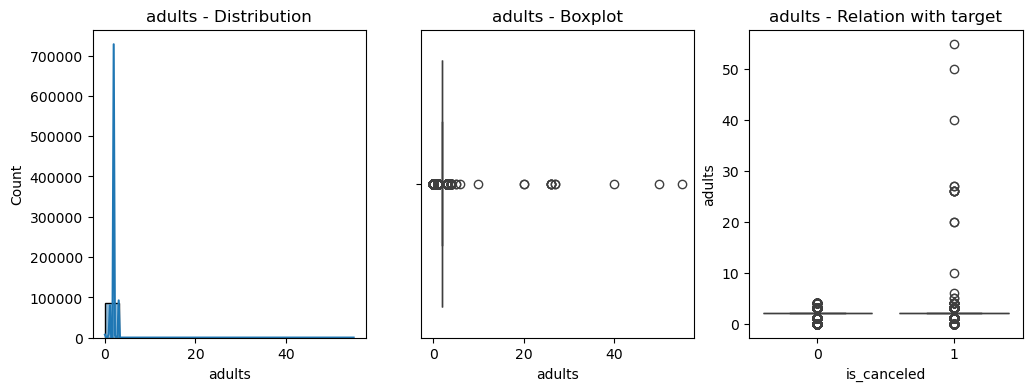

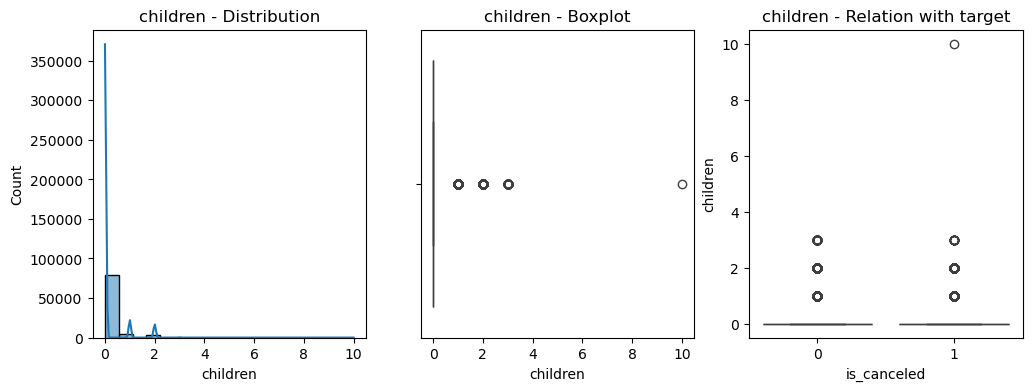

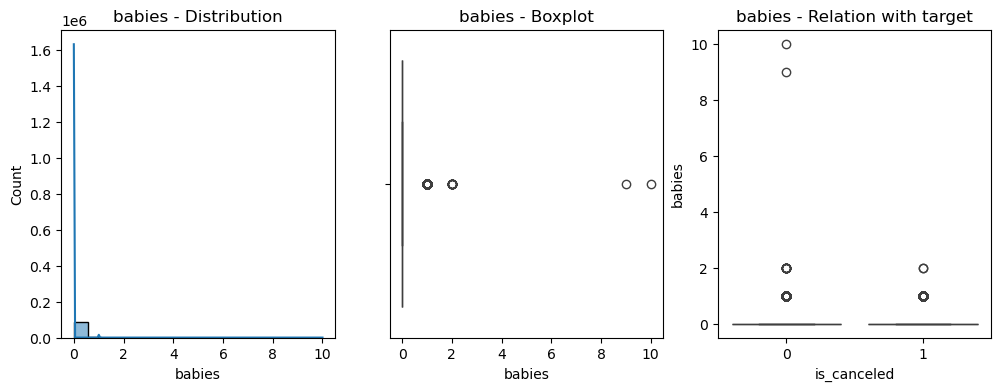

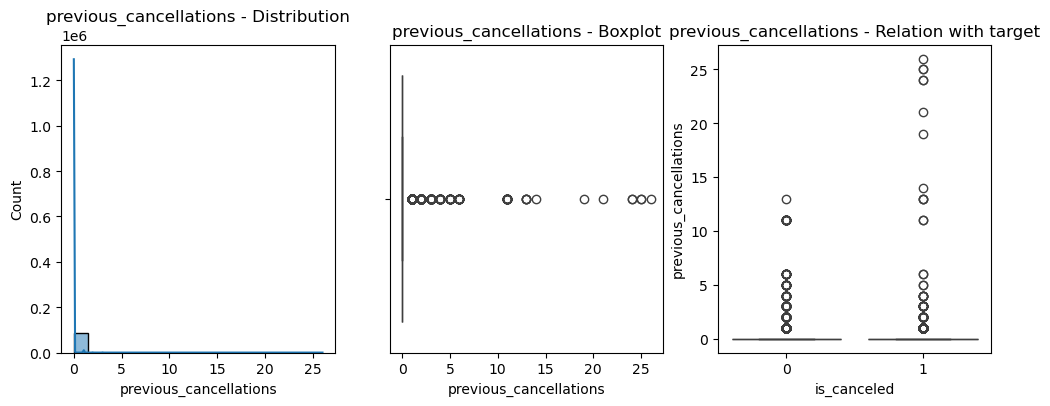

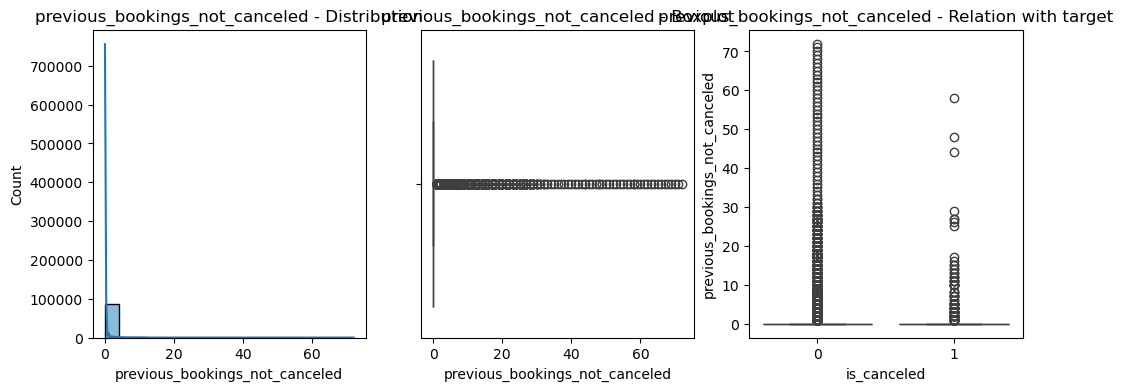

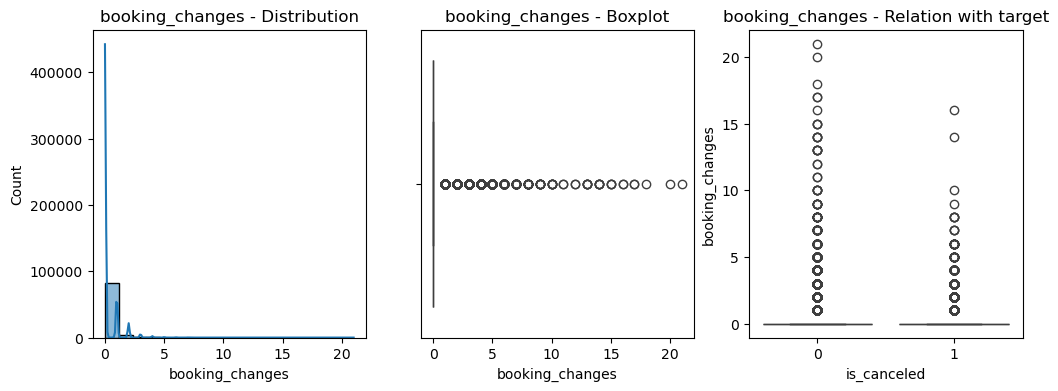

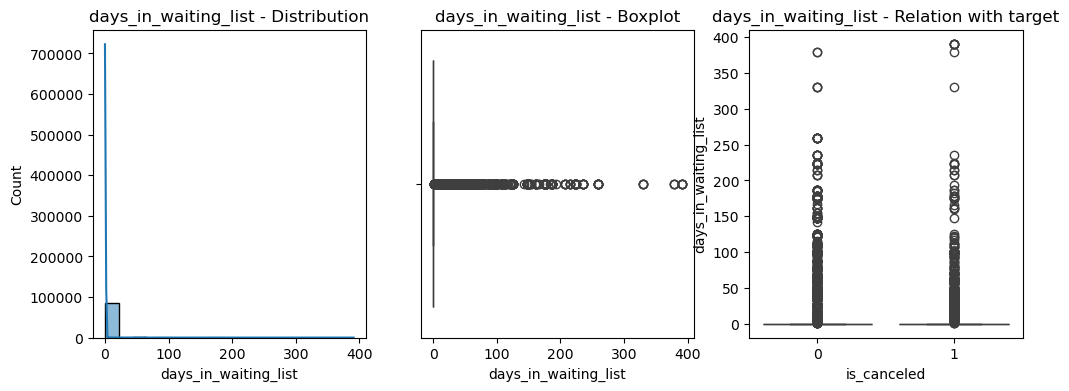

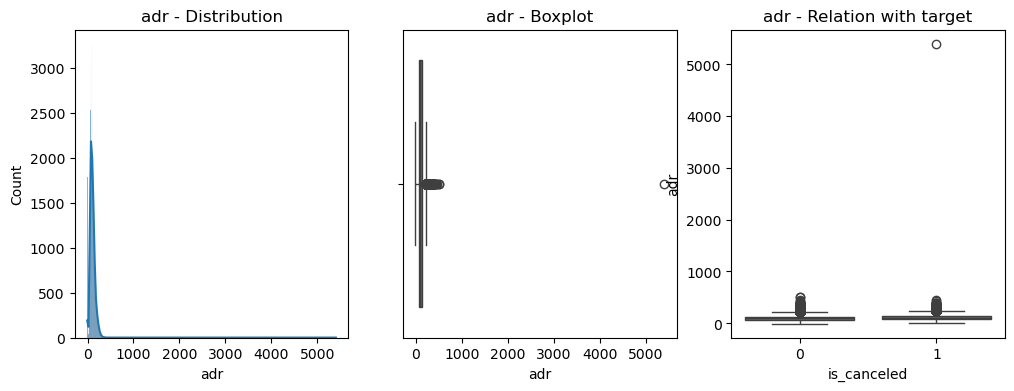

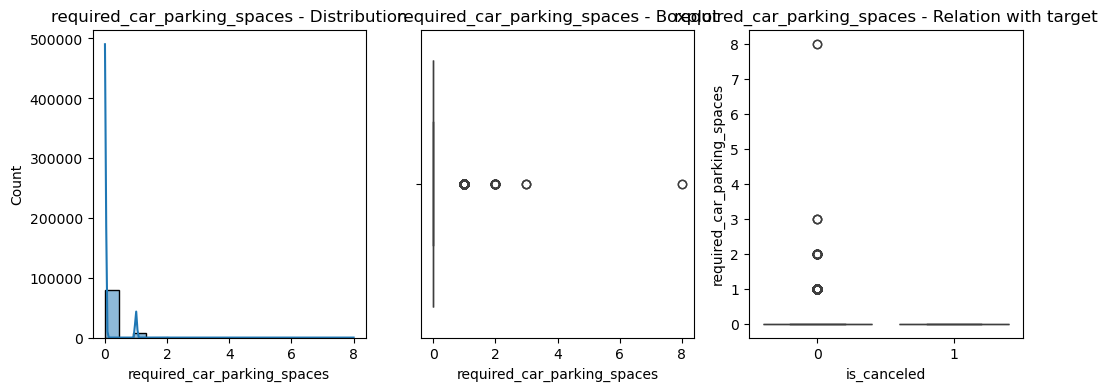

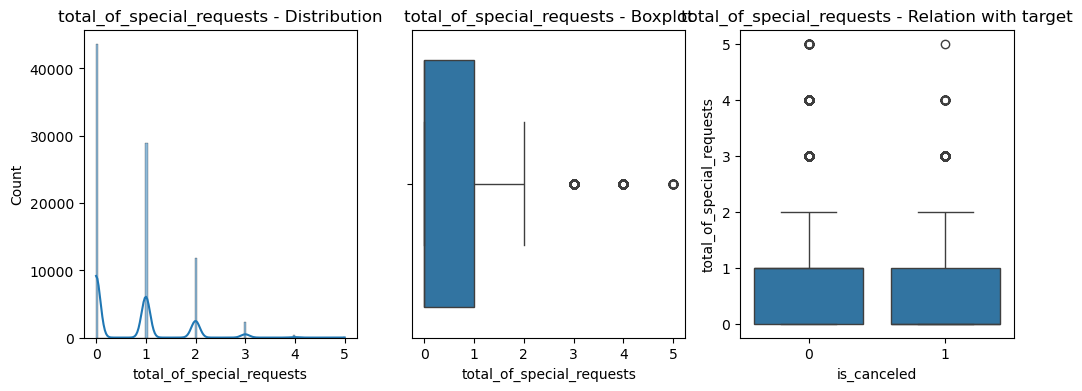

In [37]:
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df4,
             x=col,
             kde=True, ax = ax[0])
    ax[0].set_title(f'{col} - Distribution')

    sns.boxplot(data=df4,
            x = col,
            ax = ax[1])
    ax[1].set_title(f'{col} - Boxplot')

    sns.boxplot(data=df4, 
                x='is_canceled', 
                y=col, 
                ax=ax[2])
    ax[2].set_title(f'{col} - Relation with target')
plt.show()

ini merupakan summary dari semua kolom yang di cleaning dengan melihat outlier pada kolom tersebut dan terhadap target yaitu `is_canceled`. tujuan dibuatnya visualisasi ini selain sebagai summary dari visualisasi sebelum sebelumnya, yaitu untuk mengevaluasi dampak menghilangkan outlier dari hasil 0 atau 1 kolom `is_canceled`nya. Dan berdasarkan visualisasi diatas, penghapusan outlier tidak akan membuat data menjadi lebih imbalance dari sebelumnya meskipun tetap perlu melakukan oversampling.

### Evaluation Outlier with Dataframe

In [38]:
def find_anomalies_summary(df4, cols):
    results = []

    for col in cols:
        q1 = df4[col].quantile(0.25)
        q3 = df4[col].quantile(0.75)
        iqr = q3 - q1
        limit = 1.5 * iqr

        lower = q1 - limit
        upper = q3 + limit

        below = (df4[col] < lower).sum()
        above = (df4[col] > upper).sum()
        total_outliers = below + above

        # Store result
        results.append({
            'Feature': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Lower_Limit': lower,
            'Upper_Limit': upper,
            'Outliers_Below': below,
            'Outliers_Above': above,
            'Total_Outliers': total_outliers,
            'Outlier_Percentage': round((total_outliers / len(df4) * 100), 2)
        })

    results_df = pd.DataFrame(results)
    return results_df

cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

outlier_summary = find_anomalies_summary(df4, cols)
display(outlier_summary)

,Feature,Q1,Q3,IQR,Lower_Limit,Upper_Limit,Outliers_Below,Outliers_Above,Total_Outliers,Outlier_Percentage
0,lead_time,12.00,125.0,113.00,-157.500,294.500,0,2470,2470,2.84
1,stays_in_weekend_nights,0.00,2.0,2.00,-3.000,5.000,0,218,218,0.25
2,stays_in_week_nights,1.00,4.0,3.00,-3.500,8.500,0,1522,1522,1.75
3,adults,2.00,2.0,0.00,2.000,2.000,16594,6006,22600,25.99
4,children,0.00,0.0,0.00,0.000,0.000,0,8353,8353,9.61
5,babies,0.00,0.0,0.00,0.000,0.000,0,911,911,1.05
6,previous_cancellations,0.00,0.0,0.00,0.000,0.000,0,1658,1658,1.91
7,previous_bookings_not_canceled,0.00,0.0,0.00,0.000,0.000,0,3322,3322,3.82
8,booking_changes,0.00,0.0,0.00,0.000,0.000,0,15822,15822,18.20
9,days_in_waiting_list,0.00,0.0,0.00,0.000,0.000,0,860,860,0.99


berdasarkan evaluasi outlier diatas, terdapat 4 kolom yang memiliki persentasi outlier diatas 8% atau banyak seperti kolom `adults`, `children`, `booking_changes`, dan `required_car_parking_spaces`, sehingga lebih baik menghilangkan outlier dari kolom yang memiliki persentase outlier yang dibawah 8% terlebih dahulu

In [39]:
cols2 = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 'total_of_special_requests'
    ]

for col in cols2:
    q1 = df4[col].quantile(0.25)
    q3 = df4[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df4 = df4[(df4[col] <= upper_limit)]

print(f"New dataset shape after removing all outliers: {df4.shape}")

New dataset shape after removing all outliers: (71720, 30)


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71720 entries, 2 to 87394
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           71720 non-null  object 
 1   is_canceled                     71720 non-null  int64  
 2   lead_time                       71720 non-null  int64  
 3   arrival_date_year               71720 non-null  int64  
 4   arrival_date_month              71720 non-null  object 
 5   arrival_date_week_number        71720 non-null  int64  
 6   arrival_date_day_of_month       71720 non-null  int64  
 7   stays_in_weekend_nights         71720 non-null  int64  
 8   stays_in_week_nights            71720 non-null  int64  
 9   adults                          71720 non-null  int64  
 10  children                        71720 non-null  float64
 11  babies                          71720 non-null  int64  
 12  meal                            71720

not yet clean the outliers

babies mungkin perlu di ilangin
stays_in_weekeend_nights + stays_in_week_nights != 0 harusnya tapi kalo gk di cancel mungkin dia short stay aja

In [41]:
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03
6,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03


ada beberapa anomali dimana seharusnya `stays_in_weekeend_nights` + `stays_in_week_nights` != 0 kalau memang jadi menginap, tetapi memang ada orang yang short stay seperti digunakan untuk meeting di hotel atau resort sehingga secara pencatatan kolom `stays_in_weekeend_nights` dan `stays_in_week_nights` = 0 dan ini tetap valid

In [42]:
listItem = []
for col in df4.columns :
    listItem.append([col, df4[col].dtype, df4[col].isna().sum(), round((df4[col].isna().sum()/len(df4[col])) * 100,2),
                    df4[col].nunique(), list(df4[col].unique()[:8]) ])

df4Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df4Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,295,"[7, 13, 14, 0, 9, 85, 75, 23]"
3,arrival_date_year,int64,0,0.0,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.0,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.0,53,"[27, 28, 29, 30, 31, 32, 33, 34]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[1, 2, 3, 4, 5, 6, 7, 8]"
7,stays_in_weekend_nights,int64,0,0.0,5,"[0, 1, 2, 4, 3]"
8,stays_in_week_nights,int64,0,0.0,7,"[1, 2, 3, 4, 5, 6, 0]"
9,adults,int64,0,0.0,5,"[1, 2, 3, 4, 0]"


In [43]:
df5 = df4.drop(columns=['reservation_status', 'reservation_status_date'])

kolom `reservation_status` dan `reservation_status_date` memiliki arti yang sama dengan kolom `is_canceled` dan `arrival_date` sehingga dapat dihapus

In [44]:
df5 = df5.drop(columns=['reserved_room_type', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list','babies'])

summary deskripsi diatas memperlihatkan bahwa ada beberapa kolom yang hanya memiliki 1 unique value seperti kolom `days_in_waiting_list`, `previous_bookings_not_canceled`, `previous_cancellations`, dan `babies` yang tidak memberikan informasi tambahan ketika unique valuenya hanya 1 jenis sehingga kolom kolom tersebut dapat dihilangkan. kolom `reserved_room_type` di sisi yang lain tidak memiliki arti yang cukup kuat untuk dipertahankan karena ada kolom `assigned_room_type` yang memiliki arti yang mirip tetapi lebih pasti karena customer yang menginap mendapatkan ruangan berdasarkan kolom tersebut dan bukan kolom `reserved_room_type`.

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71720 entries, 2 to 87394
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        71720 non-null  object 
 1   is_canceled                  71720 non-null  int64  
 2   lead_time                    71720 non-null  int64  
 3   arrival_date_year            71720 non-null  int64  
 4   arrival_date_month           71720 non-null  object 
 5   arrival_date_week_number     71720 non-null  int64  
 6   arrival_date_day_of_month    71720 non-null  int64  
 7   stays_in_weekend_nights      71720 non-null  int64  
 8   stays_in_week_nights         71720 non-null  int64  
 9   adults                       71720 non-null  int64  
 10  children                     71720 non-null  float64
 11  meal                         71720 non-null  object 
 12  country                      71720 non-null  object 
 13  market_segment       

In [46]:
a = 86940
b = 71720
c = (a - b)/a * 100
print(c)

17.506326201978375


terdapat 17.5 %  data yang telah dikeluarkan karena dianggap anomali atau outlier dan berpotensi mengurangi akurasi machine learning

In [47]:
def find_anomalies_summary(df5, cols):
    results = []

    for col in cols:
        q1 = df5[col].quantile(0.25)
        q3 = df5[col].quantile(0.75)
        iqr = q3 - q1
        limit = 1.5 * iqr

        lower = q1 - limit
        upper = q3 + limit

        # Count how many outliers are below or above limits
        below = (df5[col] < lower).sum()
        above = (df5[col] > upper).sum()
        total_outliers = below + above

        # Store result
        results.append({
            'Feature': col,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Lower_Limit': lower,
            'Upper_Limit': upper,
            'Outliers_Below': below,
            'Outliers_Above': above,
            'Total_Outliers': total_outliers,
            'Outlier_Percentage': round((total_outliers / len(df5) * 100), 2)
        })

    # Convert to DataFrame for easier viewing
    results_df = pd.DataFrame(results)
    return results_df

cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'booking_changes', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

outlier_summary = find_anomalies_summary(df5, cols)
display(outlier_summary)

,Feature,Q1,Q3,IQR,Lower_Limit,Upper_Limit,Outliers_Below,Outliers_Above,Total_Outliers,Outlier_Percentage
0,lead_time,11.0,114.0,103.0,-143.5,268.5,0,882,882,1.23
1,stays_in_weekend_nights,0.0,2.0,2.0,-3.0,5.0,0,0,0,0.00
2,stays_in_week_nights,1.0,3.0,2.0,-2.0,6.0,0,0,0,0.00
3,adults,2.0,2.0,0.0,2.0,2.0,12770,4907,17677,24.65
4,children,0.0,0.0,0.0,0.0,0.0,0,6094,6094,8.50
5,booking_changes,0.0,0.0,0.0,0.0,0.0,0,11968,11968,16.69
6,adr,74.8,131.4,56.6,-10.1,216.3,0,638,638,0.89
7,required_car_parking_spaces,0.0,0.0,0.0,0.0,0.0,0,5612,5612,7.82
8,total_of_special_requests,0.0,1.0,1.0,-1.5,2.5,0,0,0,0.00


hasil dari eliminasi outlier yang berada diatas upper_limit setiap kolom yang memiliki outlier_percentage dibawah 8% membuat beberapa outlier dari column lain juga berkurang meskipun tetap banyak. column `booking_changes`, `adults`, `children`, `required_car_parking_spaces` perlu di investigasi secara individu

In [48]:
df5[df5['booking_changes'] > 3].head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
692,Resort Hotel,0,6,2015,July,31,27,1,3,2,0.0,BB,ESP,Direct,Direct,0,F,5,No Deposit,Transient,162.00,0,2
1161,Resort Hotel,0,64,2015,August,34,20,2,4,3,1.0,HB,MAR,Offline TA/TO,TA/TO,0,C,4,No Deposit,Transient,163.23,0,0
1361,Resort Hotel,0,2,2015,August,35,29,2,4,3,0.0,BB,PRT,Direct,Direct,0,C,5,No Deposit,Transient,173.25,0,0
1868,Resort Hotel,0,16,2015,September,39,25,0,1,1,0.0,SC,PRT,Direct,Direct,0,A,4,No Deposit,Transient-Party,80.00,0,1
2181,Resort Hotel,1,35,2015,October,41,10,0,1,2,1.0,BB,PRT,Corporate,Corporate,0,A,4,No Deposit,Transient,67.50,0,0


In [49]:
df5[df5['required_car_parking_spaces'] > 1].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
136,Resort Hotel,0,44,2015,July,28,5,2,0,3,0.0,HB,PRT,Online TA,TA/TO,0,G,3,No Deposit,Transient,225.0,2,0
2359,Resort Hotel,0,122,2015,October,43,22,1,3,2,0.0,BB,ESP,Online TA,TA/TO,0,E,0,No Deposit,Transient,55.0,2,2
4502,Resort Hotel,0,225,2016,May,22,26,2,3,2,0.0,BB,GBR,Groups,Direct,0,A,2,Refundable,Transient-Party,80.0,2,0
12369,Resort Hotel,0,155,2015,August,31,1,4,6,2,0.0,HB,PRT,Online TA,TA/TO,0,G,2,No Deposit,Transient,201.8,2,1
12947,Resort Hotel,0,199,2015,September,36,3,0,3,1,0.0,BB,DEU,Online TA,TA/TO,0,D,0,No Deposit,Transient-Party,99.0,2,2


In [50]:
df5[df5['adults'] > 3].head() #kayaknya aman aman aja kalo lebih dari 3 cuma segini, mungkin sama adeknya atau kakaknya

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
122,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,FB,PRT,Complementary,Direct,0,H,2,No Deposit,Transient,0.00,0,1
345,Resort Hotel,0,0,2015,July,29,13,1,1,4,0.0,BB,PRT,Direct,Direct,0,H,0,No Deposit,Transient,150.00,0,0
970,Resort Hotel,1,95,2015,August,33,10,2,5,4,0.0,BB,PRT,Direct,Direct,0,H,0,No Deposit,Transient,190.00,0,0
4478,Resort Hotel,1,26,2016,May,22,26,0,3,4,0.0,BB,PRT,Direct,Direct,0,H,0,No Deposit,Transient,175.00,0,0
8257,Resort Hotel,1,94,2017,April,16,16,2,2,4,0.0,HB,PRT,Online TA,TA/TO,0,C,1,Refundable,Transient,108.36,0,0


dari pemeriksaan individu kolom kolom tersebut tidak mengindikasikan bahwa itu memang outlier yang tidak memiliki cukup arti dan perlu dihilangkan. besar persentase outlier dari kolom kolom tersebut mungkin ada karena upperlimit dari kolomnya 0 dan sama dengan lower limit, yang berarti 75% isi kolom kolom tersebut sama misal pada kolom `children` yang batas atasnya adalah 0 dan max children yang tercatat adalah 3 yang mana itu normal normal saja. begitu juga dengan kolom lain seperti `adults`, `required_parking_spaces`, dan `booking_changes` yang maximum unique valuenya hanya sedikit yang berarti data tersebut masih sangat masuk akal.

In [51]:
df5.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000
mean,0.269799,71.112856,2016.201910,26.559133,15.846096,0.925223,2.377886,1.886587,0.119855,0.006553,0.245524,103.823706,0.078597,0.625139
std,0.443858,71.436117,0.678628,13.770081,8.836330,0.880450,1.498497,0.497873,0.419842,0.080687,0.674138,44.707645,0.270506,0.714281
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,74.800000,0.000000,0.000000
50%,0.000000,47.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000
75%,1.000000,114.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,131.400000,0.000000,1.000000
max,1.000000,294.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,1.000000,17.000000,227.250000,3.000000,2.000000


## Column Engineering

### Changing Logic for Short Stay

In [52]:
df5['arrival_date'] = pd.to_datetime(
    df5['arrival_date_year'].astype(str) + '-' +
    df5['arrival_date_month'] + '-' +
    df5['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# Identify same-day stays
same_day_mask = (df5['stays_in_weekend_nights'] == 0) & (df5['stays_in_week_nights'] == 0)

# Check if arrival date is weekend
df5['is_weekend_arrival'] = df5['arrival_date'].dt.dayofweek.isin([5, 6])  # Sat=5, Sun=6

# Apply the 0.5 correction conditionally
df5.loc[same_day_mask & df5['is_weekend_arrival'], 'stays_in_weekend_nights'] = 0.5
df5.loc[same_day_mask & ~df5['is_weekend_arrival'], 'stays_in_week_nights'] = 0.5

# Drop helper column
df5.drop(columns=['is_weekend_arrival', 'arrival_date'], inplace=True)


perubahan koding untuk `stays_in_weekend_nights` dan `stays_in_week_nights` dilakukan karena ada beberapa customer yang hanya short stay dengan berbagai kemungkinan alasan, dimana mereka tidak tercatat menginap dimalam karena hanya menggunakan kamar hotel/resort pada pagi/siang hari / short stay sehingga perlu adanya 0.5 untuk memberikan insight bahwa orang tersebut ada, menginap, tatapi hanya sebentar

### Creating Total_guests

In [53]:
df5['total_guests'] = df5['adults'] + df5['children']

column `total_guests` dibuat untuk mempermudah penglihatan total visitor secara keseluruhan dalam setiap bookingan. selain itu pihak hotel dapat memanfaatkan data ini sebagai acuan untuk pembuatan paket keluarga atau orang dengan jumlah tertentu untuk memaksimalkan occupancy room

### Creating Total_stay

In [54]:
df5['total_stay'] = df5['stays_in_weekend_nights'] + df5['stays_in_week_nights']

`total_stay` dibuat dengan tujuan mempermudah melihat total hari bookingan setiap customer/bookingan. dengan bantuan column `total_stay` manager dapat membuat planning discount untuk jangka waktu tertentu sehingga menarik untuk calon customer dengan mempertimbangkan total hari bookingan yang paling diminati customer dari tahun 2015-2017

### Creating Group_type

In [55]:
def group_type(row):
    adults = row['adults']
    children = row['children']
    

    # total guests
    total = adults + children

    if total == 1 and adults == 1:
        return 'Solo'
    elif adults == 2 and (children == 0):
        return 'Couple'
    elif adults >= 3:
        return 'Group'
    elif (children > 0):
        return 'Family'
    else:
        return 'Other'

df5['group_type'] = df5.apply(group_type, axis=1)

`group_type` dibuat untuk pengkategorian customer yang datang setiap bookingan.
dengan kategori ini, pihak hotel/resort dapat mengetahui kategori market hotel mereka dan merancang iklan yang lebih sesuai supaya pengunjung bertambah lebih banyak.

### Creaeting Season

In [56]:
def get_season(month):
    month = month.lower()
    if month in ['december', 'january', 'february']:
        return 'Winter'
    elif month in ['march', 'april', 'may']:
        return 'Spring'
    elif month in ['june', 'july', 'august']:
        return 'Summer'
    else:
        return 'Autumn'

df5['season'] = df5['arrival_date_month'].apply(get_season)

`season` dibuat untuk pengkategorian waktu datang customer. Dengan adanya column ini pihak hotel dapat mengoptimalkan jumlah karyawan yang bekerja dengan penyesuaian peak season dan low season sehingga cost yang dikeluarkan untuk biaya gaji karyawan dapat ditekan dan dioptimalkan.

### Creating country_full 

In [57]:
import pycountry

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code  # fallback if code not found

df5['country_full'] = df5['country'].apply(get_country_name)
df5 = df5.drop(columns=['country'])

column country dapat dibuang karena sudah ada column `country_full` yang memberikan informasi tentang asal negara yang lebih tepat dan bukan hanya kode negaranya

## Data Analysis

In [58]:
df5.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay,group_type,season,country_full
2,Resort Hotel,0,7,2015,July,27,1,0.0,1.0,1,0.0,BB,Direct,Direct,0,C,0,No Deposit,Transient,75.0,0,0,1.0,1.0,Solo,Summer,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0.0,1.0,1,0.0,BB,Corporate,Corporate,0,A,0,No Deposit,Transient,75.0,0,0,1.0,1.0,Solo,Summer,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0.0,2.0,2,0.0,BB,Online TA,TA/TO,0,A,0,No Deposit,Transient,98.0,0,1,2.0,2.0,Couple,Summer,United Kingdom
5,Resort Hotel,0,0,2015,July,27,1,0.0,2.0,2,0.0,BB,Direct,Direct,0,C,0,No Deposit,Transient,107.0,0,0,2.0,2.0,Couple,Summer,Portugal
6,Resort Hotel,0,9,2015,July,27,1,0.0,2.0,2,0.0,FB,Direct,Direct,0,C,0,No Deposit,Transient,103.0,0,1,2.0,2.0,Couple,Summer,Portugal


In [59]:
print("Dimensi Data:", df5.shape)


Dimensi Data: (71720, 27)


**Descriptive Statistics :**

In [60]:
df5.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
count,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000,71720.000000
mean,0.269799,71.112856,2016.201910,26.559133,15.846096,0.926025,2.381198,1.886587,0.119855,0.006553,0.245524,103.823706,0.078597,0.625139,2.006442,3.307223
std,0.443858,71.436117,0.678628,13.770081,8.836330,0.879834,1.493783,0.497873,0.419842,0.080687,0.674138,44.707645,0.270506,0.714281,0.652801,1.946750
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,0.000000,11.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,74.800000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,47.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,114.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,131.400000,0.000000,1.000000,2.000000,4.000000
max,1.000000,294.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,1.000000,17.000000,227.250000,3.000000,2.000000,5.000000,10.000000


## **Analisis Cancellation Rate**

Cancellation Rate Overall :

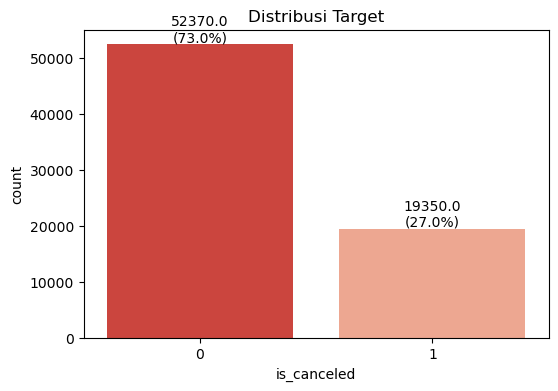

is_canceled
0    52370
1    19350
Name: count, dtype: int64
is_canceled
0    73.02
1    26.98
Name: proportion, dtype: float64


In [144]:
plt.figure(figsize=(6,4))
sns.countplot(data=df5, x='is_canceled', palette='Reds_r')
plt.title('Distribusi Target')
tot = len(df5)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}\n({height/tot:.1%})', 
                       (p.get_x()+p.get_width()/2., height), 
                       ha='center', va='bottom', fontsize=10)
plt.show()

print(df5['is_canceled'].value_counts())
print((df5['is_canceled'].value_counts(normalize=True)*100).round(2))

In [62]:
cancel_counts = df5['is_canceled'].value_counts()
cancel_rate = df5['is_canceled'].mean()*100

print("Cancellation Counts:")
print(cancel_counts)
print("\nOverall Cancellation Rate: {:.2f}%".format(cancel_rate))

Cancellation Counts:
is_canceled
0    52370
1    19350
Name: count, dtype: int64

Overall Cancellation Rate: 26.98%


Data target cukup imbalanced sehingga bisa dicoba strategi balancing dengan metode oversampling pada saat modeling

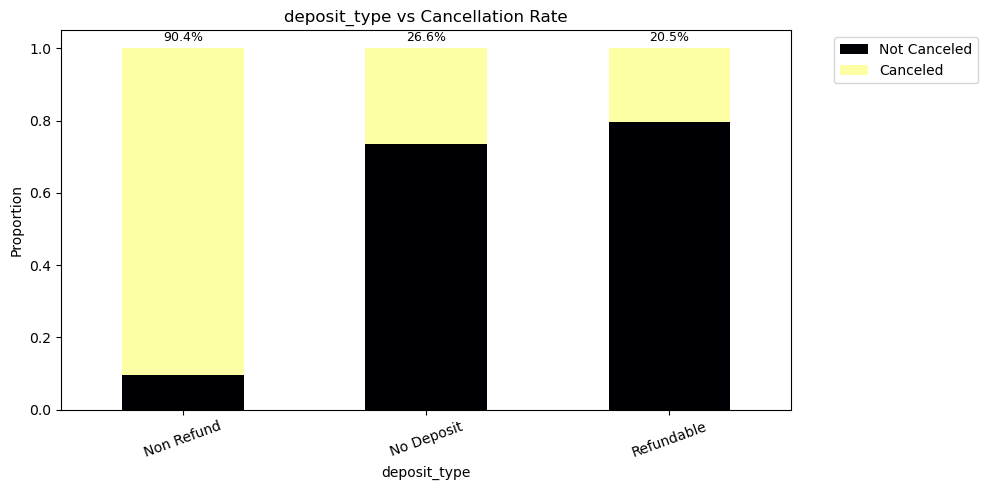

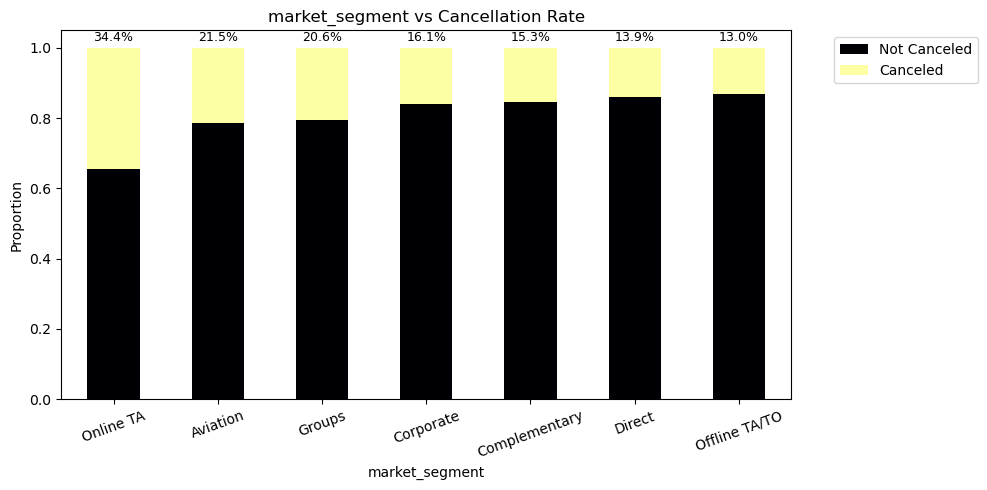

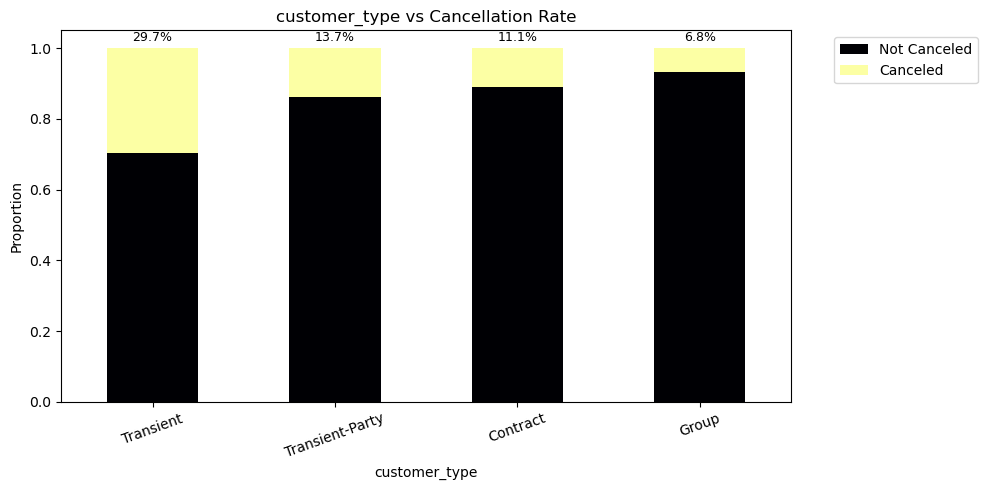

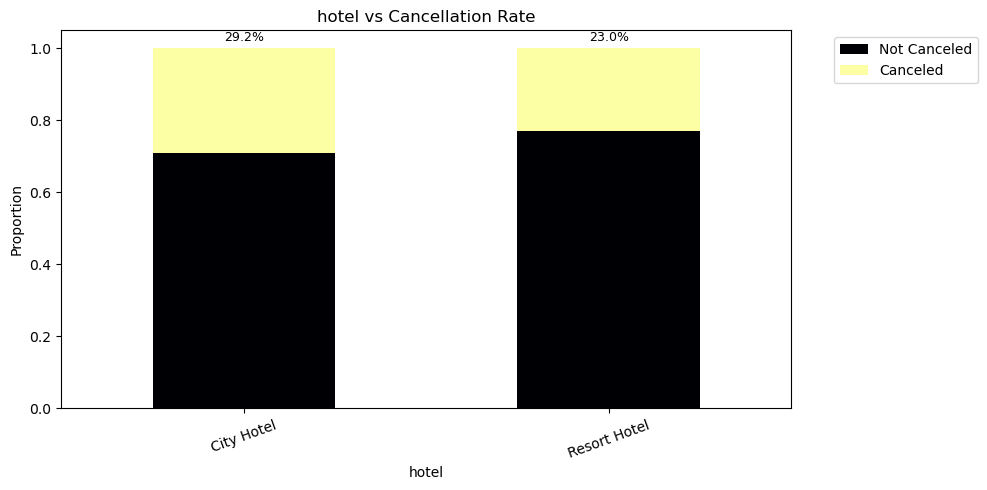

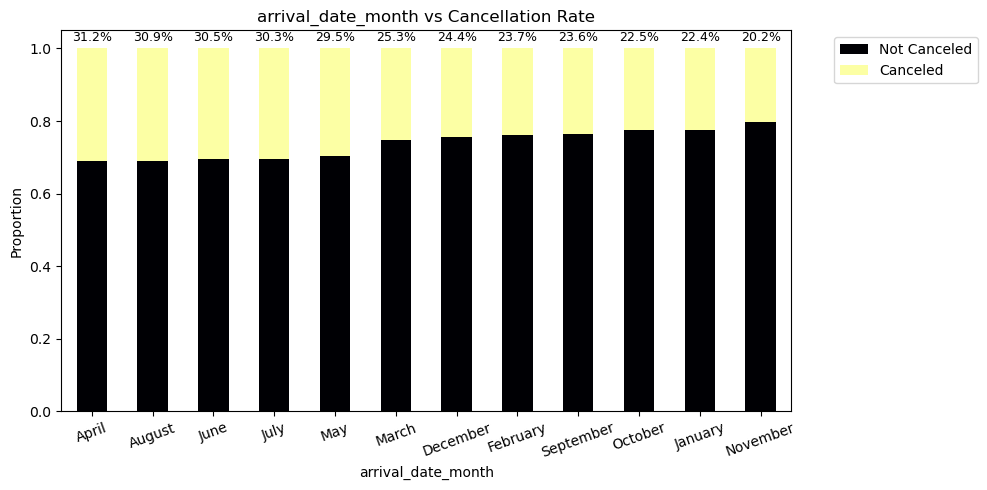

In [146]:
for col in ['deposit_type','market_segment','customer_type','hotel','arrival_date_month']:
    if col in df5.columns:
        prop = pd.crosstab(df5[col], df5['is_canceled'], normalize='index')
        prop = prop.sort_values(1, ascending=False)  # sort by cancel rate
        
        ax = prop.plot(
            kind='bar',
            stacked=True,
            figsize=(10,5),
            colormap='inferno'
        )
        
        for i, (idx, row) in enumerate(prop.iterrows()):
            cancel_rate = row[1] * 100
            ax.text(i, 1.02, f'{cancel_rate:.1f}%', ha='center', fontsize=9)

        
        plt.title(f'{col} vs Cancellation Rate')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.xticks(rotation=20)
        plt.legend(['Not Canceled', 'Canceled'], bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

Selanjutnya kita akan melihat lebih detail cancellation rate per fitur .

## **Analisis Hotel Type**

In [64]:
hotel_cancel = pd.crosstab(df5['hotel'], df5['is_canceled'], normalize='index') * 100
hotel_cancel

is_canceled,0,1
hotel,,
City Hotel,70.809374,29.190626
Resort Hotel,77.036368,22.963632


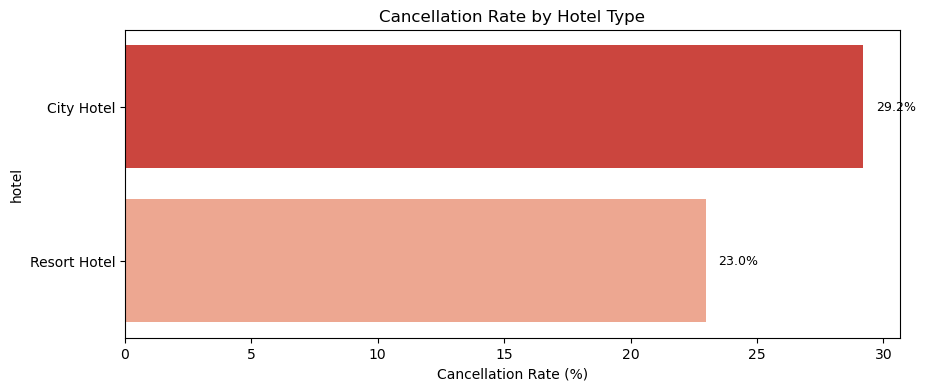

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.barplot(
    y=hotel_cancel.index,
    x=hotel_cancel[1],
    palette="Reds_r"
)

# Add labels
for i, value in enumerate(hotel_cancel[1]):
    ax.text(
        value + 0.5,      
        i,
        f'{value:.1f}%',
        va='center',
        fontsize=9
    )
plt.title("Cancellation Rate by Hotel Type")
plt.xlabel("Cancellation Rate (%)")
plt.show()


City hotel memiliki cancellation rate lebih tinggi daripada Resort Hotel, dapat diinterpretasi apabila city hotel mungkin lebih banyak business dan short stay sehingga lebih sensitif dengan perubahan jadwal. Resort hotel lebih ke liburan sehingga dibutuhkan rencana yang lebih matang

## **Analisis Month**

Di tahap analisis ini kita akan melihat bulan dengan tingkat cancellation rate tertinggi.

In [66]:
month_cancel = pd.crosstab(df5['arrival_date_month'], df5['is_canceled'], normalize='index') * 100
month_cancel = month_cancel.sort_values(1, ascending=False)
month_cancel


is_canceled,0,1
arrival_date_month,,
April,68.849149,31.150851
August,69.087657,30.912343
June,69.547325,30.452675
July,69.656992,30.343008
May,70.486656,29.513344
March,74.690320,25.309680
December,75.635492,24.364508
February,76.279247,23.720753
September,76.358242,23.641758


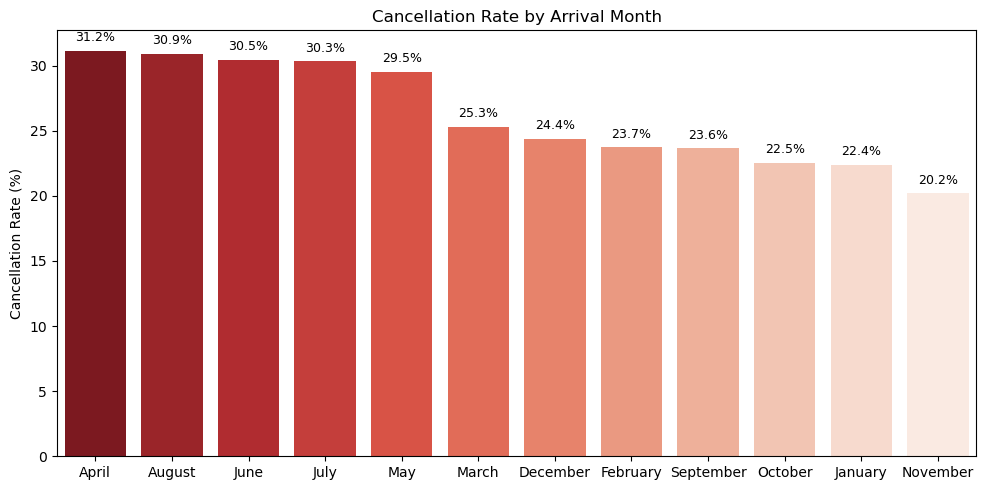

In [139]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=month_cancel.index,
    y=month_cancel[1],
    palette="Reds_r"
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Cancellation Rate by Arrival Month")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Berdasarkan grafik tersebut kita tahu apabila bulan **April** adalah bulan dengan tingkat cancellation rate tertinggi, diikuti dengan bulan **Agustus** dan **Juni**. 

## **Analisis Market Segment**

In [68]:
segment_cancel = pd.crosstab(df5['market_segment'], df5['is_canceled'], normalize='index') * 100
segment_cancel = segment_cancel.sort_values(1, ascending=False)
segment_cancel

is_canceled,0,1
market_segment,,
Online TA,65.612154,34.387846
Aviation,78.523490,21.476510
Groups,79.394613,20.605387
Corporate,83.912088,16.087912
Complementary,84.651163,15.348837
Direct,86.064351,13.935649
Offline TA/TO,87.013221,12.986779


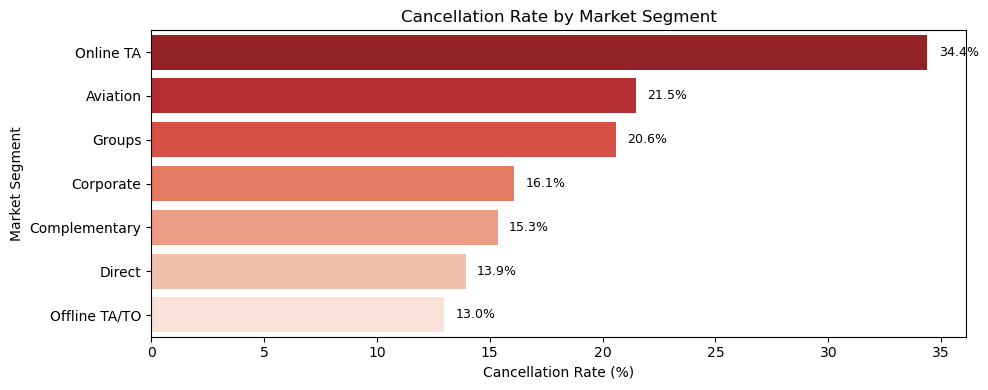

In [132]:
plt.figure(figsize=(10,4))
ax = sns.barplot(
    y=segment_cancel.index,
    x=segment_cancel[1],
    palette="Reds_r"
)

# Add labels
for i, value in enumerate(segment_cancel[1]):
    ax.text(
        value + 0.5,      # sedikit ke kanan dari bar
        i,
        f'{value:.1f}%',
        va='center',
        fontsize=9
    )

plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Cancellation Rate (%)")
plt.ylabel("Market Segment")
plt.tight_layout()
plt.show()

Market segment Online TA (Travel Agents) memiliki kecendrungan reservasi impulsif dan mudah melakukan cancellation, market segment **Direct** dan juga segment **Offline TA/TO** lebih berkomitmen terhadap reservasi

## **Analisis Deposit Type**

In [70]:
deposit_cancel = pd.crosstab(df5['deposit_type'], df5['is_canceled'], normalize='index') * 100
deposit_cancel = deposit_cancel.sort_values(1, ascending=False)
deposit_cancel


is_canceled,0,1
deposit_type,,
Non Refund,9.641256,90.358744
No Deposit,73.409097,26.590903
Refundable,79.545455,20.454545


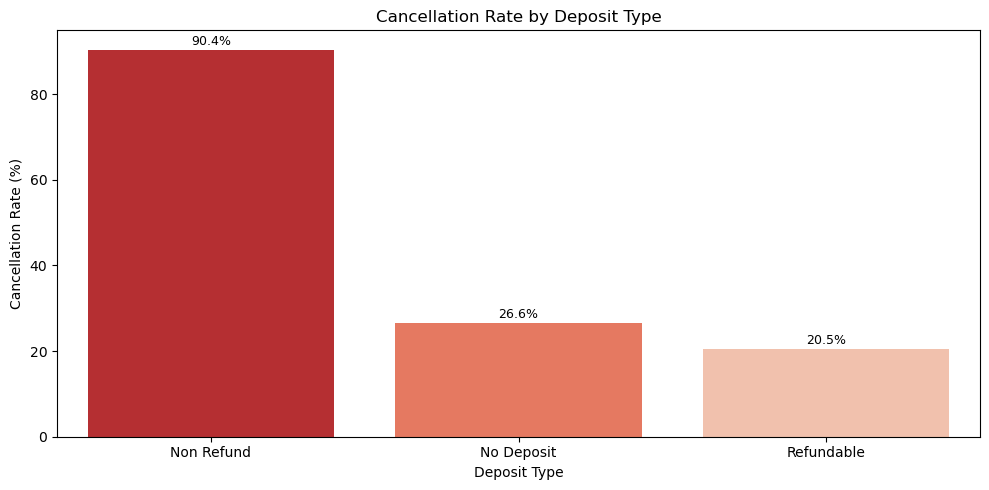

In [135]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=deposit_cancel.index,
    y=deposit_cancel[1],
    palette="Reds_r"
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Deposit Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Reservasi dengan deposit type **Non Refund** sangat beresiko untuk melakukan cancellation, yang dapat mengindikasikan bahwa banyak tamu menggunakan opsi ini untuk booking spekulatif. Sehingga untuk struktur deposit perlu di evaluasi ulang, dapat juga ditambahkan sistem penalty

## **Analisis Country**

Pada tahap ini kita akan melihat negara mana yang memiliki tingkat cancellation rate tertinggi.

In [72]:
if 'country_full' in df5.columns:
    display(df5['country_full'].value_counts().head(20))

country_full
Portugal              20383
United Kingdom         8363
France                 7954
Spain                  6318
Germany                4777
Italy                  2732
Ireland                2472
Belgium                1849
Brazil                 1731
Netherlands            1717
United States          1660
Switzerland            1388
CN                      947
Austria                 838
Sweden                  751
China                   741
Poland                  661
Russian Federation      476
Norway                  411
Romania                 399
Name: count, dtype: int64

In [73]:
top10 = df5['country_full'].value_counts().head(10).index
country_cancel = pd.crosstab(df5[df5['country_full'].isin(top10)]['country_full'],
                             df5[df5['country_full'].isin(top10)]['is_canceled'],
                             normalize='index') * 100
country_cancel = country_cancel.sort_values(1, ascending=False)
country_cancel


is_canceled,0,1
country_full,,
Italy,63.689605,36.310395
Brazil,64.355864,35.644136
Portugal,65.633126,34.366874
Spain,74.517252,25.482748
Ireland,77.386731,22.613269
United Kingdom,79.648452,20.351548
Germany,80.092108,19.907892
France,80.286648,19.713352
Belgium,80.421850,19.578150


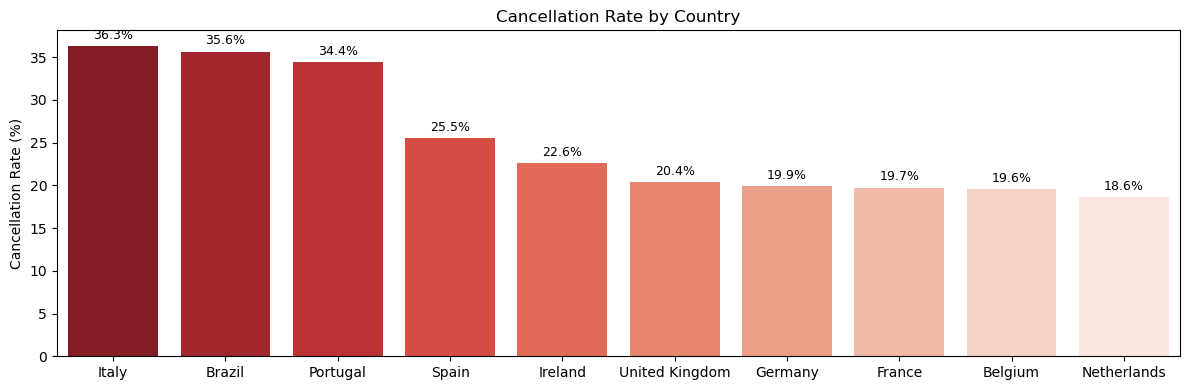

In [137]:
plt.figure(figsize=(12,4))
ax = sns.barplot(
    x=country_cancel.index,
    y=country_cancel[1],
    palette="Reds_r"
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Cancellation Rate by Country")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Berdasarkan grafik diatas dapat dilihat bahwa negara dengan tingkat cancellation rate tertinggi yaitu **Italy**, diikuti dengan **Brazil** dan juga **Portugal**. Hal ini mengindikasikan bahwa tamu dari negara-negara tersebut cenderung memiliki perilaku pemesanan yang lebih tidak pasti, yang bisa dipengaruhi oleh faktor seperti jarak perjalanan yang jauh, atau kecenderungan memesan lebih awal tanpa komitmen kuat.

Perbedaan ini menunjukkan bahwa negara asal tamu merupakan faktor penting dalam risiko pembatalan, sehingga dapat dimanfaatkan oleh hotel untuk:

- Menyesuaikan kebijakan deposit atau pembayaran di muka
- Meningkatkan overbooking strategy secara lebih terkontrol
- Memberikan prioritas mitigasi risiko pada pasar dengan cancellation rate tinggi

## **Analisis Customer Type**

In [75]:
customer_cancel = pd.crosstab(df5['customer_type'], df5['is_canceled'], normalize='index') * 100
customer_cancel = customer_cancel.sort_values(1, ascending=False)
customer_cancel

is_canceled,0,1
customer_type,,
Transient,70.298465,29.701535
Transient-Party,86.293374,13.706626
Contract,88.935379,11.064621
Group,93.247588,6.752412


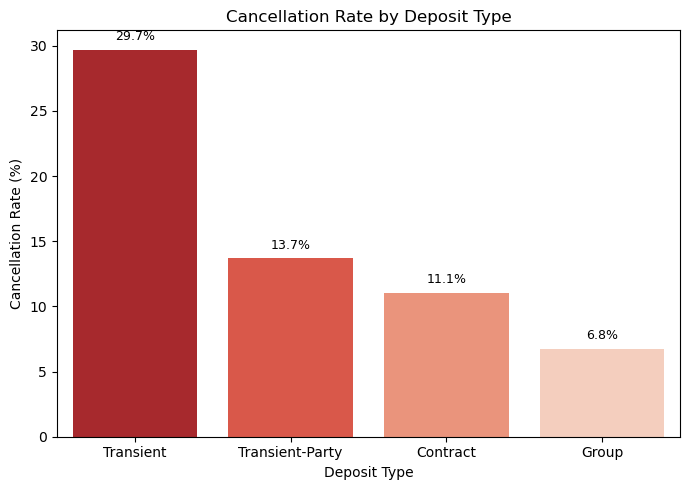

In [138]:
plt.figure(figsize=(7,5))
ax = sns.barplot(
    x=customer_cancel.index,
    y=customer_cancel[1],
    palette="Reds_r"
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Deposit Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Tipe customer dengan cancellation rate tertinggi adalah **Transient**. Ini menunjukkan kalau tamu individu cenderung lebih fleksibel dan mudah untuk membatalkan reservasi, dan tingkat terendah yaitu **Group** menunjukkan komitmen tinggi karena akan berdampak pada banyak pihak dan melibatkan biaya yang besar.

Setelah ini data akan disiapkan untuk pembuatan model

## Data Preparation

In [77]:
df = df5.copy()
#df = df.drop(columns=['arrival_date'])


In [78]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].unique()[:2]) ]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[0, 1]"
2,lead_time,int64,0,0.0,295,"[7, 13]"
3,arrival_date_year,int64,0,0.0,3,"[2015, 2016]"
4,arrival_date_month,object,0,0.0,12,"[July, August]"
5,arrival_date_week_number,int64,0,0.0,53,"[27, 28]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[1, 2]"
7,stays_in_weekend_nights,float64,0,0.0,6,"[0.0, 1.0]"
8,stays_in_week_nights,float64,0,0.0,8,"[1.0, 2.0]"
9,adults,int64,0,0.0,5,"[1, 2]"


In [79]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [80]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'K', 'P'],
      dtype=object)

In [81]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 3])

In [82]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'assigned_room_type', 'deposit_type',
       'customer_type', 'group_type', 'season', 'country_full'],
      dtype='object')


In [83]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,distribution_channel,is_repeated_guest,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay,group_type,season,country_full
2,Resort Hotel,0,7,2015,July,27,1,0.0,1.0,1,0.0,BB,Direct,Direct,0,C,0,No Deposit,Transient,75.0,0,0,1.0,1.0,Solo,Summer,United Kingdom
3,Resort Hotel,0,13,2015,July,27,1,0.0,1.0,1,0.0,BB,Corporate,Corporate,0,A,0,No Deposit,Transient,75.0,0,0,1.0,1.0,Solo,Summer,United Kingdom
4,Resort Hotel,0,14,2015,July,27,1,0.0,2.0,2,0.0,BB,Online TA,TA/TO,0,A,0,No Deposit,Transient,98.0,0,1,2.0,2.0,Couple,Summer,United Kingdom
5,Resort Hotel,0,0,2015,July,27,1,0.0,2.0,2,0.0,BB,Direct,Direct,0,C,0,No Deposit,Transient,107.0,0,0,2.0,2.0,Couple,Summer,Portugal
6,Resort Hotel,0,9,2015,July,27,1,0.0,2.0,2,0.0,FB,Direct,Direct,0,C,0,No Deposit,Transient,103.0,0,1,2.0,2.0,Couple,Summer,Portugal


Pertama kita coba melakukan fitur encoding untuk fitur fitur categorical yang kita miliki.

One Hot Encoding : **"hotel, arrival_date_month, meal, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type, group_type, season"** - Karena fitur tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

Binary Encoding : **"country"** - Karena fitur ini memiliki unique data yang banyak dan tidak memilki urutan/tidak ordinal.



In [84]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'group_type', 'season']),
    ('binary', BinaryEncoder(), ['country_full'])
], remainder='passthrough')

In [85]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [87]:
import lightgbm as lgb

## Modeling & Evaluation

In [88]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

## Model Benchmarking : K-Fold

In [89]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, fbeta_score, make_scorer
import pandas as pd

models = [logreg, knn, dt, rf, xgb, lgbm]
score = []
rata = []
std = []

# ros = RandomOverSampler(random_state=42)
#F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2, average='binary', pos_label=1)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    
    estimator = Pipeline([
        # ('oversample', ros),               
        ('preprocess', transformer),
        ('model', model)
    ])
    
    cv_results = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring=f2_scorer,
        error_score='raise'
    )
    
    score.append(cv_results)
    rata.append(cv_results.mean())
    std.append(cv_results.std())

results = pd.DataFrame({
    'model': ['LogReg', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean f2 score': rata,
    'std dev': std
}).set_index('model')

results.sort_values(by='mean f2 score', ascending=False)


[LightGBM] [Info] Number of positive: 12384, number of negative: 33516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 45900, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269804 -> initscore=-0.995618
[LightGBM] [Info] Start training from score -0.995618
[LightGBM] [Info] Number of positive: 12384, number of negative: 33517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 45901, number of used features: 79
[LightGBM] [Info] [b

,mean f2 score,std dev
model,,
XGBoost,0.624684,0.005832
LightGBM,0.605583,0.011030
Random Forest,0.579160,0.014667
Decision Tree,0.574762,0.010776
LogReg,0.339286,0.064933
KNN,0.313721,0.005620


Model terbaik berdasarkan nilai mean f2 score adalah XGBoost dengan default hyperparameter

## Model Benchmarking : Test Data

In [90]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f2 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    #y_predict_proba = estimator.predict_proba(x_test)[:,1] <-- buat roc_auc
    score_f2.append(fbeta_score(y_test,y_pred, beta=2))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f2 score':score_f2}).set_index('model').sort_values(by='f2 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86     10474
           1       0.65      0.34      0.44      3870

    accuracy                           0.77     14344
   macro avg       0.72      0.63      0.65     14344
weighted avg       0.75      0.77      0.74     14344

KNN 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     10474
           1       0.43      0.30      0.35      3870

    accuracy                           0.70     14344
   macro avg       0.60      0.57      0.58     14344
weighted avg       0.67      0.70      0.68     14344

Decision Tree 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     10474
           1       0.57      0.58      0.57      3870

    accuracy                           0.77     14344
   macro avg       0.71      0.71      0.71     14344
weighted avg       0.77      0

,f2 score
model,
XGBoost,0.617056
LightGBM,0.603606
Random Forest,0.585681
Decision Tree,0.578032
Logistic Regression,0.373650
KNN,0.316985


Pada test data XGBoost adalah model yang terbaik. Sekarang coba pakai oversampling untuk melihat apakah dapat menghasilkan nilai yang lebih baik.

## **XGBoost Model Explained**

XGBoost is an advanced implementation of gradient boosting that use decision tree as a base model that always Improves mistakes from previous trees and Corrects errors sequentially. That is why type of algorithm of xgboost is boosting. This is the formula:

**Fm​(x)=Fm−1​(x)+γm​hm​(x)**

Fm−1(x) = previous model

hm(x) = new tree trained on errors that use features to preduce

γm= weight (learning rate), parameter = learning_rate (default = 0.5)


Reference for XGBoost :
https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

## Test Oversampling with K-Fold Cross Validation

In [91]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    f2_scorer = fbeta_score(y_train, predictions, beta=2, average='binary')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc,
        'f2 score': f2_scorer, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    f2_scorer = fbeta_score(y_test, predictions, beta=2, average='binary')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'f2 score': f2_scorer,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [92]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [93]:
data = x_train
target = y_train

In [94]:
from imblearn.pipeline import Pipeline

train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    xgb = XGBClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',xgb)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

## Evaluation Metrics Without Oversampling

In [95]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'], 
                     tr['f2 score'],val['f2 score'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train F2 Score',
                            'Test F2 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train F2 Score,Test F2 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.864828,0.830429,0.929161,0.886600,0.820871,0.774532,0.702906,0.633887,0.684683,0.616279,0.786657,0.715679
1,0.867462,0.833043,0.931692,0.890070,0.824762,0.778162,0.710291,0.639612,0.692794,0.622093,0.790111,0.720808
2,0.865816,0.823458,0.932104,0.881665,0.822003,0.765803,0.703753,0.623092,0.685113,0.606589,0.789691,0.699181
3,0.864983,0.830952,0.930799,0.892973,0.821602,0.774234,0.706267,0.630163,0.689133,0.611111,0.784267,0.719939
4,0.869089,0.823632,0.933968,0.878720,0.826755,0.762903,0.712434,0.609120,0.694516,0.588501,0.794417,0.708398
5,0.866881,0.824678,0.931471,0.888522,0.823636,0.764976,0.707076,0.614152,0.688846,0.594315,0.790788,0.708783
6,0.868607,0.827436,0.932992,0.884370,0.826040,0.770844,0.711066,0.629482,0.693009,0.612403,0.793801,0.708520
7,0.866225,0.826041,0.930286,0.886693,0.822594,0.769098,0.704818,0.627323,0.686262,0.610465,0.790296,0.705224
8,0.865199,0.829005,0.930753,0.881078,0.821301,0.772665,0.703262,0.631229,0.684898,0.613695,0.787749,0.712678
9,0.862991,0.835977,0.928860,0.893250,0.818633,0.779993,0.700546,0.635101,0.682817,0.614341,0.781740,0.734363


## Evaluation Metrics With Oversampling

In [96]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['f2 score'],val['f2 score'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train F2 Score',
                            'Test F2 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train F2 Score,Test F2 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.861733,0.794353,0.936485,0.885664,0.861452,0.765393,0.890713,0.759622,0.906752,0.821059,0.831853,0.584637
1,0.863324,0.796270,0.937108,0.888198,0.863071,0.767352,0.891018,0.761455,0.906354,0.822351,0.834534,0.587448
2,0.859107,0.795051,0.935146,0.882031,0.858835,0.765861,0.887461,0.758736,0.903066,0.819121,0.830087,0.585952
3,0.861720,0.799233,0.936655,0.892154,0.861448,0.770120,0.890221,0.762590,0.905983,0.821705,0.832302,0.592179
4,0.862529,0.789648,0.937629,0.876491,0.862252,0.757861,0.891343,0.738287,0.907309,0.791990,0.832729,0.580767
5,0.862210,0.795225,0.936324,0.884522,0.861942,0.765630,0.890578,0.756323,0.906275,0.815245,0.832874,0.586704
6,0.861644,0.795538,0.936939,0.882328,0.861378,0.766142,0.889844,0.757757,0.905429,0.817183,0.832525,0.587007
7,0.861604,0.795363,0.937243,0.885968,0.861373,0.764084,0.887948,0.745900,0.902458,0.799096,0.834289,0.589048
8,0.862254,0.789611,0.936621,0.881771,0.861992,0.759904,0.890276,0.750927,0.905773,0.811370,0.833248,0.578535
9,0.858634,0.800070,0.933471,0.890937,0.858380,0.770674,0.885952,0.761379,0.900947,0.819121,0.830652,0.593911


 Terlihat bahwa hasil evaluation metrics setelah dilakukan oversampling menunjukkan peningkatan yang cukup signifikan pada recall dari class cancel (positive class), di mana rata-ratanya meningkat dari sekitar 60% menjadi sekitar 83%. Hal ini sangat masuk akal karena data dari class cancel yang awalnya minoritas kini dibuat seimbang dengan class non-cancel, sehingga model menjadi lebih mampu menangkap pelanggan yang benar-benar akan melakukan pembatalan. Namun dampaknya precision kelas cancel mengalami penurunan dari sekitar 0.71 menjadi sekitar 0.58, yang berarti tebakan model menjadi sedikit kurang tepat. Dalam konteks bisnis hotel, kondisi ini dapat diterima jika tujuan utamanya adalah memperbesar peluang mendeteksi calon pembatalan sejak awal agar hotel bisa melakukan tindakan preventif. Dengan kata lain, model setelah oversampling memberikan potensi mitigasi kerugian yang lebih baik walaupun harus mengorbankan sedikit ketepatan prediksi.

## Classification Reports Without Oversampling

In [97]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4190
           1       0.72      0.62      0.66      1548

    accuracy                           0.83      5738
   macro avg       0.79      0.76      0.77      5738
weighted avg       0.82      0.83      0.83      5738

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4190
           1       0.72      0.62      0.67      1548

    accuracy                           0.83      5738
   macro avg       0.79      0.77      0.78      5738
weighted avg       0.83      0.83      0.83      5738

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4190
           1       0.70      0.61      0.65      1548

    accuracy                           0.82      5738
   macro avg       0.78      0.76      0.77      5738
weighted avg       0.82      0.82      0.82      5738

              preci

## Classification Reports With Oversampling

In [98]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4190
           1       0.58      0.82      0.68      1548

    accuracy                           0.79      5738
   macro avg       0.75      0.80      0.77      5738
weighted avg       0.83      0.79      0.80      5738

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4190
           1       0.59      0.82      0.69      1548

    accuracy                           0.80      5738
   macro avg       0.76      0.80      0.77      5738
weighted avg       0.83      0.80      0.81      5738

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4190
           1       0.59      0.82      0.68      1548

    accuracy                           0.80      5738
   macro avg       0.75      0.80      0.77      5738
weighted avg       0.83      0.80      0.80      5738

              preci

-- Berdasarkan classification report yang dihasilkan, model setelah dilakukan oversampling memiliki distribusi recall yang jauh lebih seimbang antara pelanggan yang cancel dan yang tidak cancel. Model awal cenderung bias ke pelanggan yang tidak melakukan pembatalan, sedangkan model setelah oversampling menjadi lebih fair dalam mengenali kedua kelompok. Karena untuk kasus ini hotel lebih membutuhkan kemampuan mendeteksi lebih banyak pelanggan potensial pembatalan daripada sekadar meningkatkan ketepatan tebakannya saja, maka model dengan oversampling menjadi pilihan yang lebih relevan untuk digunakan. Dengan asumsi bahwa hotel ingin mencegah potensi kehilangan pendapatan akibat kamar kosong mendadak, maka penggunaan model oversampling merupakan strategi yang lebih berdampak positif.

## Hyperparameter Tuning

In [99]:
ros = RandomOverSampler(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

#F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2, average='binary', pos_label=1)

estimator = Pipeline([
    ('oversample', ros),
    ('preprocess', transformer),
    ('model', xgb)
])

param_grid = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator,
    param_grid,
    cv=cv,
    scoring=f2_scorer,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(x_train, y_train)

# Best results
print("===== BEST SCORE XGBOOST =====")
print("F2 Score:", grid_xgb.best_score_)
print("Parameters:", grid_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
===== BEST SCORE XGBOOST =====
F2 Score: 0.7619121037191531
Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 1.0}


Fitting 5 folds for each of 108 candidates, totalling 540 fits
===== BEST SCORE XGBOOST =====
F2 Score: 0.7619121037191531
Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 1.0}

In [100]:
best_model = grid_xgb.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('oversample', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'group_type', 'season']),
                                                 ('binary', Bi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [101]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'group_type', 'season']),
                                                 ('binary',...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [102]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

y_pred_default_label = (y_pred_proba_default[:,1] >= 0.5).astype(int)
y_pred_tuned_label  = (y_pred_proba_tuned[:,1] >= 0.5).astype(int)

f2_default = fbeta_score(y_test, y_pred_default_label, beta=2)
f2_tuned = fbeta_score(y_test, y_pred_tuned_label, beta=2)

print('F2 Score Default XGB : ', f2_default)
print('F2 Score Tuned XGB : ', f2_tuned)

F2 Score Default XGB :  0.754612723428791
F2 Score Tuned XGB :  0.7589433391616653


In [103]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     10474
           1       0.59      0.81      0.68      3870

    accuracy                           0.80     14344
   macro avg       0.75      0.80      0.77     14344
weighted avg       0.83      0.80      0.80     14344

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.92      0.76      0.84     10474
           1       0.57      0.83      0.67      3870

    accuracy                           0.78     14344
   macro avg       0.74      0.80      0.75     14344
weighted avg       0.83      0.78      0.79     14344



-- Dapat dilihat kalau classification reports nya tidak jauh beda namun kita akan tetap menggunakan model default sebagai model akhir karena nilai F1 Score yang sedikit lebih baik.

## SHAP

In [104]:
import shap
explainer = shap.TreeExplainer(best_model['model'])

In [105]:
X_train_transformed = best_model['preprocess'].transform(X_train)

In [106]:
shap_values = explainer.shap_values(X_train_transformed)

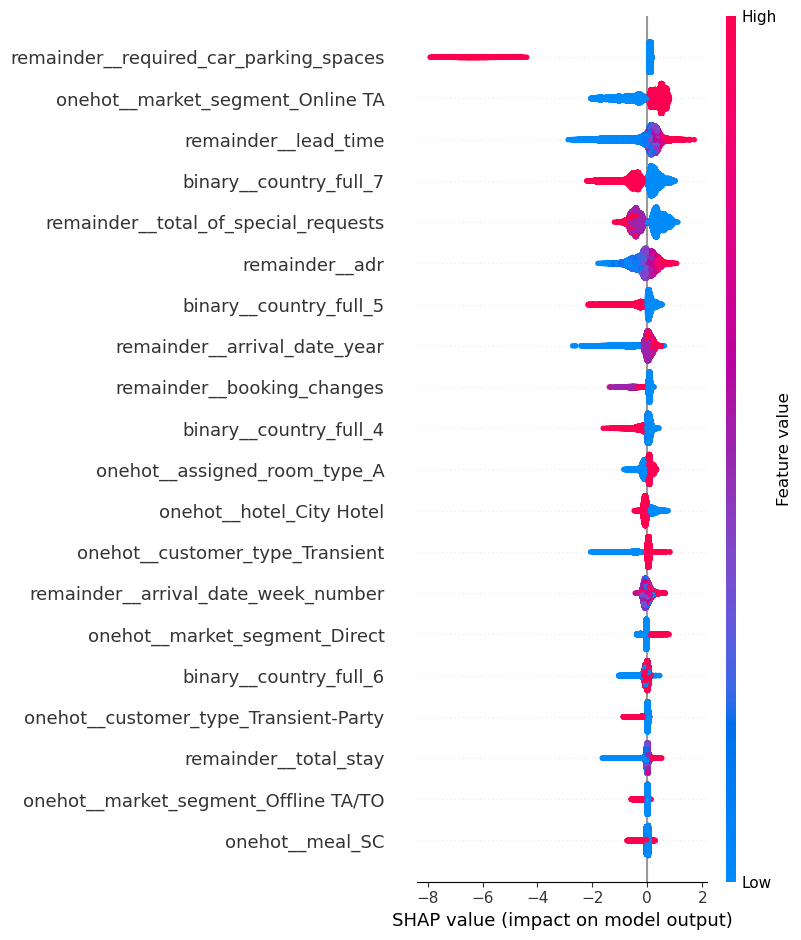

In [107]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=best_model['preprocess'].get_feature_names_out())

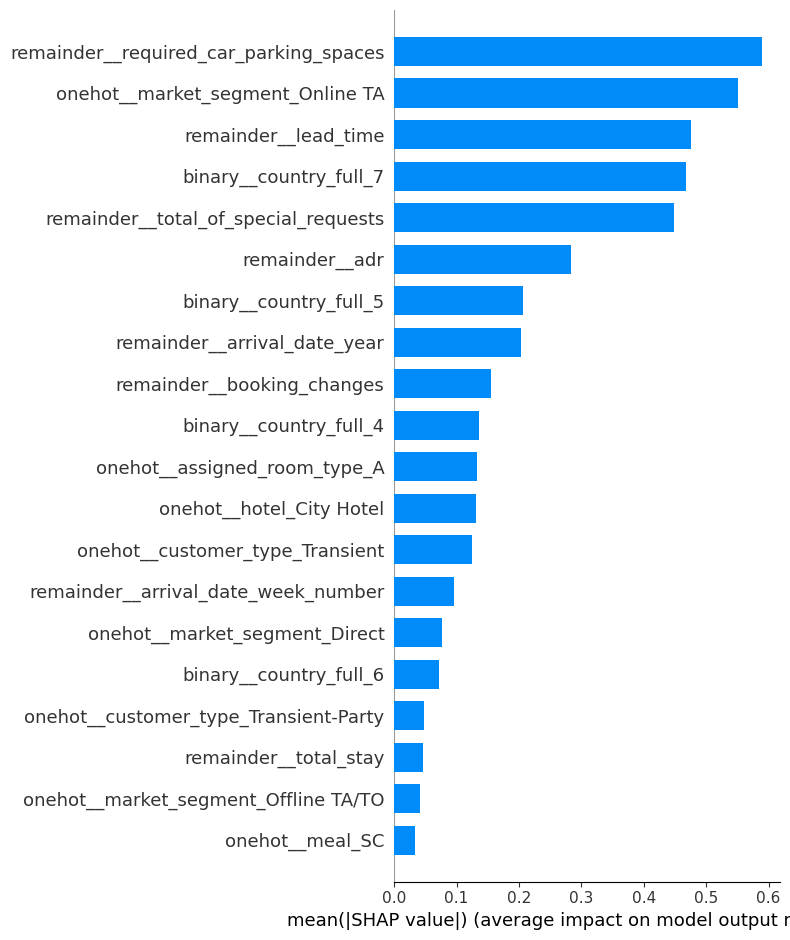

In [108]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=best_model['preprocess'].get_feature_names_out(), plot_type='bar')

-- Dapat dilihat ada dua feature yang memiliki tingkat demand tinggi, **required_car_parking_spaces** dan **total_of_special_requests**. Pelanggan yang membutuhkan parkir atau mengajukan request tambahan sangat kecil kemungkinannya untuk membatalkan. Sebaliknya, risiko pembatalan melonjak tajam pada pemesanan yang dibuat jauh hari (**lead_time** tinggi), berasal dari segmen **Online Travel Agent (TA)**, dan terutama untuk tamu yang teridentifikasi sebagai **binary__country_7**. Singkatnya, untuk mengurangi pembatalan, hotel harus mewaspadai pemesanan berjangka panjang yang datang dari platform Online dan negara berisiko tinggi tersebut, sementara permintaan parkir dan special request harus dilihat sebagai indikator kuat niat kedatangan tamu.

In [109]:
# coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail(10)
# coef1.plot(kind='barh', title='Feature Importances')
# plt.show()

In [110]:
('preprocess', transformer)

('preprocess',
 ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['hotel', 'arrival_date_month', 'meal',
                                   'market_segment', 'distribution_channel',
                                   'assigned_room_type', 'deposit_type',
                                   'customer_type', 'group_type', 'season']),
                                 ('binary', BinaryEncoder(), ['country_full'])]))

In [111]:
encoder = transformer.named_transformers_['binary']

In [112]:
encoder.get_feature_names_out()

array(['country_full_0', 'country_full_1', 'country_full_2',
       'country_full_3', 'country_full_4', 'country_full_5',
       'country_full_6', 'country_full_7'], dtype=object)

In [113]:
encoder.mapping

[{'col': 'country_full',
  'mapping':       country_full_0  country_full_1  country_full_2  country_full_3  \
   1                 0               0               0               0   
   2                 0               0               0               0   
   3                 0               0               0               0   
   4                 0               0               0               0   
   5                 0               0               0               0   
  ...              ...             ...             ...             ...   
   164               1               0               1               0   
   165               1               0               1               0   
   166               1               0               1               0   
  -1                 0               0               0               0   
  -2                 0               0               0               0   
  
        country_full_4  country_full_5  country_full_6  country_full_7  


In [114]:
mapping_df = encoder.mapping[0]['mapping']

mapping_df[mapping_df['country_full_7'] == 1]

,country_full_0,country_full_1,country_full_2,country_full_3,country_full_4,country_full_5,country_full_6,country_full_7
1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1
5,0,0,0,0,0,1,0,1
7,0,0,0,0,0,1,1,1
9,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
157,1,0,0,1,1,1,0,1
159,1,0,0,1,1,1,1,1
161,1,0,1,0,0,0,0,1
163,1,0,1,0,0,0,1,1


## Conclusion & Recommendation

In [115]:
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.92      0.76      0.84     10474
           1       0.57      0.83      0.67      3870

    accuracy                           0.78     14344
   macro avg       0.74      0.80      0.75     14344
weighted avg       0.83      0.78      0.79     14344



In [147]:
df['adr'].mean()

np.float64(103.82370552147239)

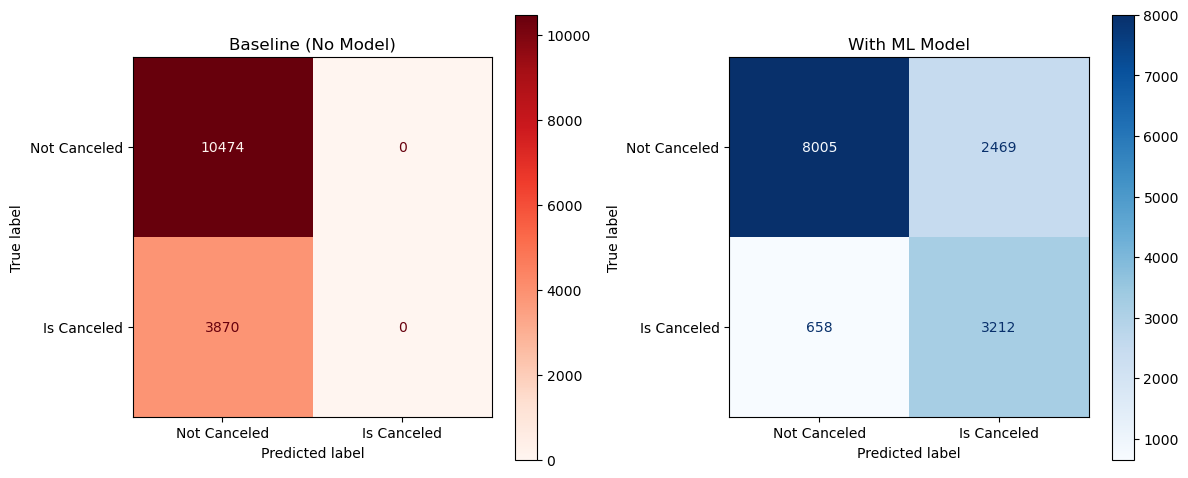

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
y_pred = best_model.predict(x_test)

# Baseline Confusion Matrix
cm_baseline = np.array([[y_test.value_counts()[0], 0],
                        [y_test.value_counts()[1], 0]])

# Plot baseline
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['Not Canceled', 'Is Canceled'])
disp_base.plot(ax=axes[0], cmap='Reds', values_format='d')
axes[0].set_title("Baseline (No Model)")

# ML Model Confusion Matrix
cm_model = confusion_matrix(y_test, y_pred)
disp_model = ConfusionMatrixDisplay(confusion_matrix=cm_model, display_labels=['Not Canceled', 'Is Canceled'])
disp_model.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("With ML Model")

plt.tight_layout()
plt.show()

On the baseline condition, the model assumes that all guests will arrive. This causes all cancellations to become FN, meaning zero detection and full revenue loss. After applying the ML model, FN decreases significantly while FP increases. This trade-off is acceptable because FN cases have dramatically higher cost impact than FP cases.

Interpretation:

TP (True Positive) → correctly detected cancellations

TN (True Negative) → correctly kept staying guests

FP (False Positive) → predicted cancel, but actually stayed

FN (False Negative) → predicted will stay, but actually cancelled

|                | Actual Not Cancel (0) | Actual Cancel (1) |
| -------------- | --------------------- | ----------------- |
| Predict Stay   | TN = 10,474           | **FN = 3,870**    |
| Predict Cancel | FP = 0                | TP = 0            |


Consequence before model:

Every cancellation produces revenue loss of ~103.8 USD

Estimated revenue loss:

3,870 × 103.8 = 401.706 USD

baseline business loss ≈ USD 401.706

## Setelah memakai model

|                    | Actual Not Cancel (0) | Actual Cancel (1) |
| ------------------ | --------------------- | ----------------- |
| Predict Stay (0)   | TN = 8,005            | **FN = 2,469**    |
| Predict Cancel (1) | **FP = 658**       | TP = 3,212       |


Interpretation:

FN dropped significantly

From 3,870 → 658

That means:

3,870 − 658 = 3,212 Kasus Cancel Reservasi Terhindarkan

Estimated savings:

3,212 × 103.8 ≈ **333.405,6 USD** 

But now what about FP:

FP = 658 cases
These customers were wrongly assumed to cancel → but actually stayed

Business cost example:

If hotel applies cancellation mitigation procedures on predicted cancels such as:

- early payment confirmation
- deposit requests
- remarketing communication
- operational allocation changes

Estimated operational cost example:
10 USD per follow-up communication

658 × 10 = 6,580 USD

## Final cost comparison
- Revenue saved because FN dropped
= USD 333.405,6

- Additional operational cost due to FP
= USD 6,580

- Net benefit of ML model
427,679 − 7,850 = 419,829

- Net business benefit ≈ **USD 326.825,6**

In [117]:
df['adr'].mean()

np.float64(103.82370552147239)

In [118]:
df['total_stay'].mean()

np.float64(3.307222532069158)

In [119]:
FN = df['adr'].mean() * df['total_stay'].mean()
FP = FN *0.5
print('COST of FN: $',round(FN))
print('COST of FP: $',round(FP))

COST of FN: $ 343
COST of FP: $ 172


**Conclusion**

After model deployment, the quantity of missed cancellations (FN) dropped significantly from 3,870 cases to approximately 2,412 cases. This reduction directly impacts revenue preservation, since each cancellation corresponds to an average daily room rate of USD 103,8. Based on this improvement, approximately 3,212 cancellations are detected earlier, contributing to potential revenue savings of around USD 333.405,6. Although the model introduces approximately 658 false positives where guests who actually stayed were predicted to cancel, the additional operational cost from follow-up actions is significantly smaller than the revenue saved. Therefore, the model provides a meaningful financial benefit and improves the hotel’s operational decision-making by better anticipating cancellations.

Sumber konsep ADR: https://www.investopedia.com/terms/a/average-daily-rate.asp

**Recommendation**

Rekomendasi Final
A. Rekomendasi Bisnis

- Membuat kebijakan konfirmasi ulang khusus untuk tamu dengan probabilitas pembatalan tinggi, seperti pengiriman email reminder untuk melakukan pembayaran awal agar reservasi tetap aktif.

- Mengirimkan informasi ketersediaan parkir, biaya parkir, dan lokasi parkir jauh hari sebelum kedatangan untuk mengurangi potensi pembatalan terkait akses parkir hotel.

- Membuat sistem otomatis untuk melakukan follow-up manual (telepon atau email) pada tamu dengan prediksi cancel tinggi, khususnya jika booking dibuat jauh sebelum tanggal menginap (lead_time tinggi).

- Menjalankan monitoring harian terhadap reservasi berisiko tinggi agar keputusan operasional (penjadwalan cleaning room, inventory logistik, dan tenaga front office) dapat diatur lebih efektif.

B. Rekomendasi Pengembangan Data dan Model

Menambah fitur atau kolom baru yang bisa dapat berhubungan dengan tingkat cancel reservasi seperti sumber platform booking, alasan perjalanan dan lain lain

- Menambahkan fitur engineered baru seperti “time between booking and stay”, “available room ratio saat booking”, atau “previous guest rating” jika data tersedia.

- Mencoba model machine learning tambahan seperti CatBoost atau stacking ensemble antar model teratas untuk meningkatkan metrik recall.

- Prioritize preventive actions such as promoting non-refundable options, requiring earlier deposits, or sending reminder notifications to guests flagged as cancellation-risk.

- Menerapkan hyperparameter tuning lebih mendalam pada model XGBoost atau LightGBM dengan evaluasi terhadap kombinasi parameter lebih luas dan iterasi validasi lebih banyak.

In [120]:
df['is_canceled'].value_counts()

is_canceled
0    52370
1    19350
Name: count, dtype: int64

## EXPORT TO CSV

In [121]:
#df.to_csv('hotel_bookings_cleaned_v3.csv', index=False)

## SAVING THE MODEL WITH PIPELINE

In [122]:
# export the model
# Extract the best estimator (only the tuned model)
# best_model1 = gridsearch.best_estimator_
#pickle.dump(best_model, open("best_model_xgbr_hotel_bookings.sav", "wb"))